# UNDERSTANDING AI MODULE- SUMMATIVE ASSESSMENT SOURCE CODE


### Student ID: 202255348

# COMPONENT 2- Video Game Dataset


### About Dataset
This Dataset provides up-to-date information on the sales performance and popularity of various video games worldwide. The data includes the attributes:  name of the video game, platform on which the game was released example PlayStation, Xbox etc, the year in which the game was released, the genre of the video game example sports, adventure etc, the firm responsible for publishing the game, and the sales in North America, Europe, Japan, and other regions. It also features scores and ratings from both critics and users, including average critic score, number of critics reviewed, average user score, number of users reviewed, developer, and rating. This comprehensive and essential dataset offers valuable insights into the global video game market and is a must-have tool for gamers, industry professionals, and market researchers.


#### Objective
- The task is to predict the sales performance of several video games worldwide.

NB: Global sales is the target and we are doing supervised learning. We are doing regression because the target is a continuous variable

### Steps to build regression models

- Load the data and clean
- Visualize the data
- Treat outliers
- Select all the features and target to build the model
- Split features and target into train, validation and test sets
- Normalise the data( the three set)
- Build the regression model
- Check performance of the model (overfitting, underfitting, generalization)
- If model overfits, try Lasso and Ridge regression models
- Pick the best model based on R2 or Adjusted R2
- Try using fewer features (Feature Selection)
- After selecting fewer features, rebuild your best model
- Check performance of the best model using the fewer features
- Finally , validate your best model on your test set

### Import the required packages

In [1]:
#Importing the libraries for data manipulation and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

from sklearn. linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score,adjusted_rand_score, v_measure_score, rand_score, adjusted_mutual_info_score


### Load the dataset

In [3]:
vid_gamz_df= pd.read_csv("Video_Games.csv")


## Exploring the data

In [4]:
# check the first 5 rows
vid_gamz_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
vid_gamz_df.duplicated().sum()

0

In [6]:
# Check the data types
vid_gamz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


We have 16719 entries and 16 columns. It tells us the various type of data types associated with the columns. I noticed User_Score is object and this is not consistent with the data as it is in numbers. Hence we know there is a problem with User_Score

In [7]:
# checking for missing values
vid_gamz_df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

I notice 2 missing values in Name, 269 in Year_of _Release, 2 in Genre, 54 in Punlisher, 8582 each in Critic_Score and Critic_Count, 6704 in user_Score, 9129 in User_Count, 6623 in Developer and 6769 missing values in Rating

In [8]:
# descriptive computational analysis for numerical variables
vid_gamz_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


We can see the dataset spans from Year 1980 to Year 2020. Minumum sales in NA_Sales, EU_Sales, JP_Sales and Other_Sales are all 0. The means for NA_Sales is 0.2633, EU_Sales is 0.145025, JP_Sales is 0.077602 and Other_Sales is 0.047332. Whereas median for NA_Sales is 0.08000, EU_Sales is 0.02000, JP_Sales is 0 and Other_Sales is 0.01000

In [9]:
# select only the features that are object data types and observe

cat_vid_gamz_df = vid_gamz_df.select_dtypes(include = "object")

cat_vid_gamz_df.describe()

,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
count,16717,16719,16717,16665,10015,10096,9950
unique,11562,31,12,581,96,1696,8
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts,tbd,Ubisoft,E
freq,12,2161,3370,1356,2425,204,3991


We notice from Platform the most used game was PS2, Occuring Genre and Publisher are Action and Electronic Arts respectively. We see tdb at User_Score and this is what made the User_Score to act as object instead of float. Most of the Rating occurence was E or Excellent and highest occurence for Developer was Ubisoft

### Explore each variable to note the issue with each variable

In [10]:
# Print all the categories with their counts

for col in cat_vid_gamz_df:
    print(vid_gamz_df[col].value_counts())
    print("_" * 45) # print a line of 45 underscores as a separator between counts of each column

Need for Speed: Most Wanted                         12
FIFA 14                                              9
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: Name, Length: 11562, dtype: int64
_____________________________________________
PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       

## Data Cleaning

As a Data Scientist i need to find out if i will use all the variables. If not there is no point trying to clean all the missing values. I will select the variables i will need and clean the affected parts in the variables that i will use to build my model. 

Name, Year of release, Developer will not add any contribution to the model hence since i do not need them i will not bother to clean those missing values under these variables

#### Treating Critic_Score and Critic_Count

In [11]:
vid_gamz_df["Critic_Score"].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64

In [12]:
vid_gamz_df["Critic_Count"].describe()

count    8137.000000
mean       26.360821
std        18.980495
min         3.000000
25%        12.000000
50%        21.000000
75%        36.000000
max       113.000000
Name: Critic_Count, dtype: float64

In [13]:
# we decide to fill all rows with no critic score and critic count with zero

vid_gamz_df["Critic_Score"].fillna(0, inplace = True)
vid_gamz_df["Critic_Count"].fillna(0, inplace = True)

#### Treating User_Score

In [14]:
# replace tbd with NaN
vid_gamz_df["User_Score"].replace("tbd", np.nan, inplace = True)

In [15]:
# check missing values

vid_gamz_df["User_Score"].isnull().sum()

9129

As the tbd was replaced with NaN, we notice the missing values increased from 6704 to 9129 which matches User_Count missing values

In [16]:
# we decide to fill missing values with median value
vid_gamz_df["User_Score"].fillna(vid_gamz_df["User_Score"].median(), inplace = True)

In [17]:
# convert the data type to appropriate data type (float)

vid_gamz_df["User_Score"] =vid_gamz_df["User_Score"].astype("float") 

In [18]:
# check the descriptive statistics

vid_gamz_df["User_Score"].describe() 

count    16719.00000
mean         7.32978
std          1.02773
min          0.00000
25%          7.50000
50%          7.50000
75%          7.50000
max          9.70000
Name: User_Score, dtype: float64

We notice the minimum value is 0 hence we shall replace the missing value with the median of the User_Score to be able to tell where the missing values were replaced. Or to be able to different from the zero we will not fill with zero but with median. The mean is not too far from the median but outliers affect mean hence i will use median to replace the missing values

#### Treating User_Count column

In [19]:
# observe the statistics
# check the descriptive statistics for user count

vid_gamz_df["User_Count"].describe()

count     7590.000000
mean       162.229908
std        561.282326
min          4.000000
25%         10.000000
50%         24.000000
75%         81.000000
max      10665.000000
Name: User_Count, dtype: float64

The minimum is 4 hence i can decide to fill the missing values with zero here to show the differnce or show that all 0 will be where the missing values were replaced

In [20]:
# we can fill missing values with 0

vid_gamz_df["User_Count"].fillna(0, inplace = True)

#### Treating Rating

Rating will contribute to the Global Sales.  We could use mode to fill the missing value for Rating but we could have a particular developer have excellent in one game  and poor in another part and that might not be a true reflection should we use mode and since Rating is not number i will replace a different category "Unknown"

In [21]:
# we can fill the NaN in Rating with "unknown"

vid_gamz_df["Rating"].fillna("Unknown", inplace = True)

#### Treating Genre

Genre has just 2 missing values hence we can drop those rows and believe it will not affect the data

In [22]:
# we can drop the few rows missing

vid_gamz_df.dropna(subset = ["Genre"],inplace = True)
vid_gamz_df.reset_index(drop = True, inplace = True)

In [23]:
#sanity check
vid_gamz_df.isnull().sum()

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer          6621
Rating                0
dtype: int64

I noticed when i dropped the Genre, the missing values in Name also dropped

### Selecting the top 7 platforms

To build the model we will convert the text column to numeric if it will contribute to the Global Sales ie Platform. Platform being used for the video games can contribute to sales but there are alot of platforms when we check the value counts. The implication is when we use all the platforms in the model the columns in the data would increase very much which could lead to overfitting or make my model very complex.

In [24]:
# checking the value counts for Platform
vid_gamz_df['Platform'].value_counts()

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

I will pick platforms that are very common or mostly used because that will help understand their contribution to Global Sales. I will pick platforms that were used 1000 and above times. Every other one will be put under "Others"

In [25]:
# set limit to 1000
limit = 1000

# get the value count of platforms
val_cnt = vid_gamz_df["Platform"].value_counts()


# filter the platforms to only those with at least 1000 occurrence
platform_array = val_cnt[val_cnt.values >= limit].index.tolist()
platform_array

['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

In [26]:
platform_vals = []

for i in range(vid_gamz_df.shape[0]):  # iterate over all rows in data
    txt = vid_gamz_df.Platform.values[i]  # getting the values in platform column
    flag = 0  # flag variable
    for item in platform_array:  # iterate over the list of platform considered
        if item in txt and flag == 0:  # checking if platform name is in the row
            platform_vals.append(item) # append to empty list
            flag = 1
    if flag == 0:  # if the row values is different from the list of platform considered
        platform_vals.append("Others")

We create a new column from an existing column names "Platform_ Primary". This is Feature Engineering

In [27]:
# Feature engineering.
vid_gamz_df["Platform_Primary"] = platform_vals 

In [28]:
# sanity check:

vid_gamz_df["Platform_Primary"].value_counts()

Others    4593
DS        2672
PS2       2161
PS        2022
Wii       1467
PS3       1331
X360      1262
PSP       1209
Name: Platform_Primary, dtype: int64

#### Visualization of the Data

##### Univariate Analysis: Numerical Features

In [29]:
def histogram_boxplot(data, feature, figsize=(10, 5), kde=False, bins=None):
    """
    Plot a boxplot and a histogram of a feature in a given dataframe.

    Parameters:
    -----------
    data : pandas.DataFrame
        The input dataframe.
    feature : str
        The name of the column to plot.
    figsize : tuple of float, optional
        The size of the figure. Default is (10, 5).
    kde : bool, optional
        Whether to show the density curve. Default is False.
    bins : int or sequence of scalars or str, optional
        Specification of histogram bins. Default is None.

    Returns:
    --------
    None
    """
    # create a 2x1 subplot with a shared x-axis
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # plot the boxplot on the top subplot
    sns.boxplot(
        data=data, x=feature, ax=ax_box, showmeans=True, color="red"
    )

    # plot the histogram on the bottom subplot
    if bins:
        # if bins are specified, use them in the histogram plot
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, bins=bins, palette="muted")
    else:
        # if bins are not specified, use the default number of bins in the histogram plot
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist)

    # add vertical lines at the mean and median values of the feature in the histogram plot
    ax_hist.axvline(data[feature].mean(), color="green", linestyle="--")
    ax_hist.axvline(data[feature].median(), color="violet", linestyle="-")

    # show the plot
    plt.show()


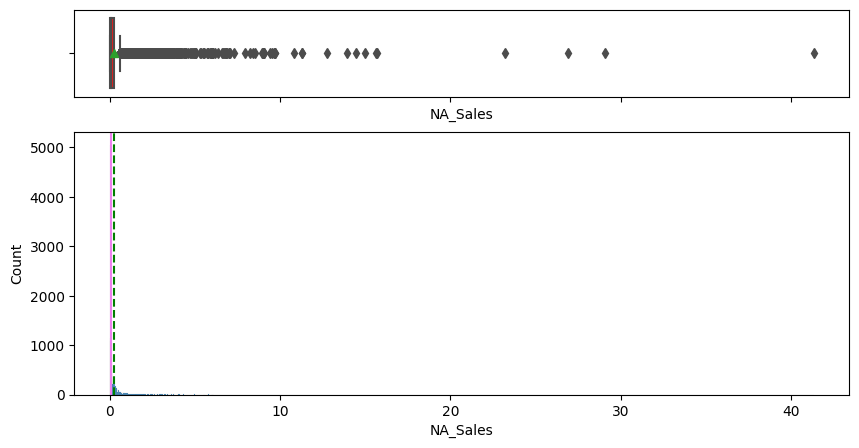

In [30]:
histogram_boxplot(data= vid_gamz_df, feature = "NA_Sales")

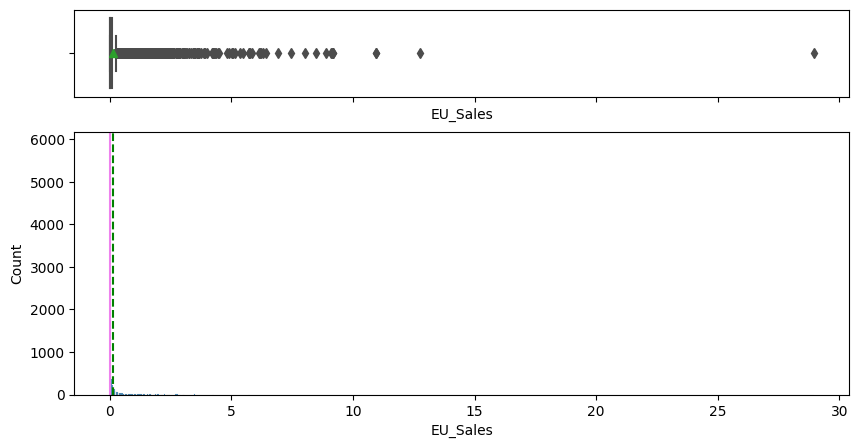

In [31]:
histogram_boxplot(data= vid_gamz_df, feature = "EU_Sales")

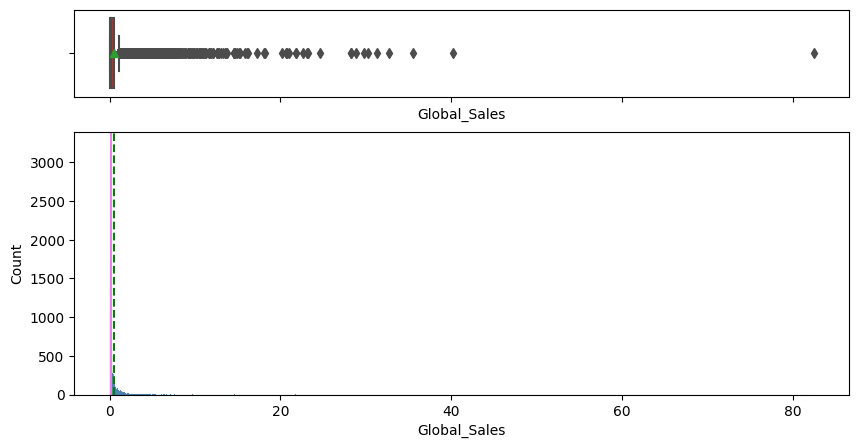

In [32]:
histogram_boxplot(data= vid_gamz_df, feature = "Global_Sales")

The plots are right skewed and i notice outliers. These outliers need to be treated. Mean and Median are close. Most of the sales are close to 0 but there are some sales above that.

##### Univariate Analysis: Categorical Features

In [33]:
# Function to create labeled barplots with optional percentage display

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Plot a labeled barplot of a categorical feature in a given dataframe.

    Parameters:
    -----------
    data : pandas.DataFrame
        The input dataframe.
    feature : str
        The name of the column to plot.
    perc : bool, optional
        Whether to display percentages instead of count. Default is False.
    n : int, optional
        The number of top category levels to display. Default is None (display all levels).

    Returns:
    --------
    None
    """
    total = len(data[feature])  # get the length of the column
    count = data[feature].nunique()  # get the number of unique categories

    # Set the size of the plot based on the number of categories to be displayed
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation = 45, fontsize = 14)  # rotate x-tick labels and set font size
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Set2",
        order=data[feature].value_counts().index[:n].sort_values(),  # set the order of bars based on the counts
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # calculate percentage of each category
        else:
            label = p.get_height()  # get the count of each category

        x = p.get_x() + p.get_width() / 2  # calculate the x coordinate of the bar
        y = p.get_height()  # get the height of the bar

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # add the label to the top of each bar

    plt.show()  # show the plot


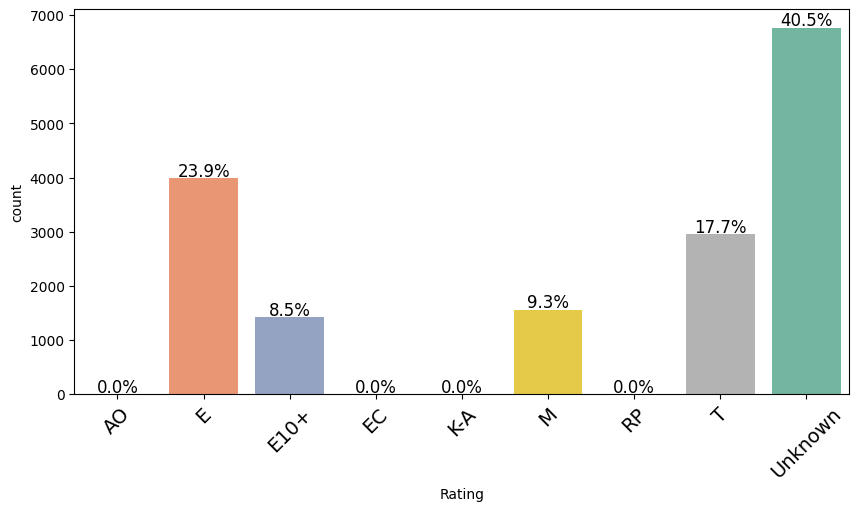

In [34]:
labeled_barplot(data = vid_gamz_df, feature= "Rating", perc = True)

Most of the Rating is Unknown followed by E and then T

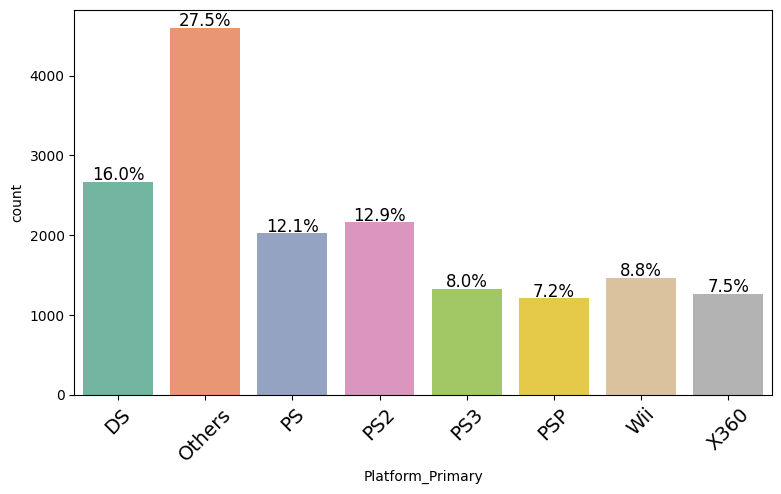

In [35]:
labeled_barplot(data = vid_gamz_df, feature= "Platform_Primary", perc = True)

Aside Others, DS was very much utilised followed by PS2 and then PS. In summary it tells us the platforms that were used the most

In [36]:
num_data = vid_gamz_df.select_dtypes(include = "number")

In [37]:
mat_corr = num_data.corr()
mat_corr

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,1.000000,-0.092388,0.003909,-0.168497,0.037701,-0.076340,0.113480,0.160668,-0.163342,0.123238
NA_Sales,-0.092388,1.000000,0.765343,0.449673,0.638700,0.941015,0.153634,0.236765,0.042090,0.211183
EU_Sales,0.003909,0.765343,1.000000,0.435087,0.722800,0.901238,0.170687,0.259729,0.021656,0.274399
JP_Sales,-0.168497,0.449673,0.435087,1.000000,0.291098,0.612345,-0.043729,0.026269,0.083757,0.032793
Other_Sales,0.037701,0.638700,0.722800,0.291098,1.000000,0.749261,0.176197,0.258435,0.023964,0.250737
Global_Sales,-0.076340,0.941015,0.901238,0.612345,0.749261,1.000000,0.148765,0.245229,0.048729,0.236929
Critic_Score,0.113480,0.153634,0.170687,-0.043729,0.176197,0.148765,1.000000,0.760743,0.033350,0.255423
Critic_Count,0.160668,0.236765,0.259729,0.026269,0.258435,0.245229,0.760743,1.000000,0.031162,0.394067
User_Score,-0.163342,0.042090,0.021656,0.083757,0.023964,0.048729,0.033350,0.031162,1.000000,-0.011932
User_Count,0.123238,0.211183,0.274399,0.032793,0.250737,0.236929,0.255423,0.394067,-0.011932,1.000000


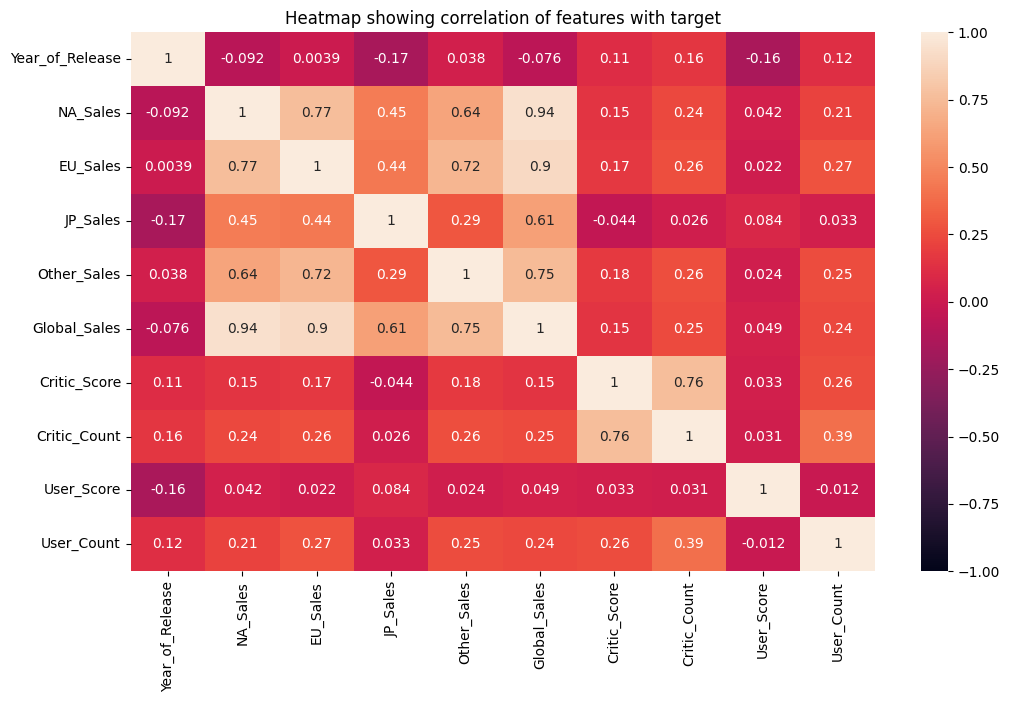

In [38]:
plt.figure(figsize = (12,7))
sns.heatmap(mat_corr, annot= True, vmin = -1, vmax = 1)
plt.title("Heatmap showing correlation of features with target")

# save plot
plt.savefig("Heatmap showing correlation of features with target.png", bbox_inches='tight')

plt.show()

The heatmap shows the relationship between the Global sales as target and the each of the other variables. We notice that NA_Sales contributed very well to the Global_Sales as well as EU_Sales is explaining about 90%. JP_Sales and Other_Sales are equally high but the Critic_Score, Critic_Count, User_Score and User_Count are very low though they are contributing to the Global Sales. We see an example of Multicolinearity between NA_Sales and EU_Sales as we say a high correlation of 77%. Other_Sales with EU_Sales and Na_Sales are very high and also showing Multicolinearity which we do not want. The Year of release has no impact on the sales.Multico btn two independent variables or features

Sales in North America and Global sales is 94%. This shows that the sales in North America has a high positive relationship with Global Sales. Meaning as Sales in North America increase there is high chance that Global Sales will increase. This is the same case with EU Sales.

# Confirming the Heatmap Correlation with scatterplots

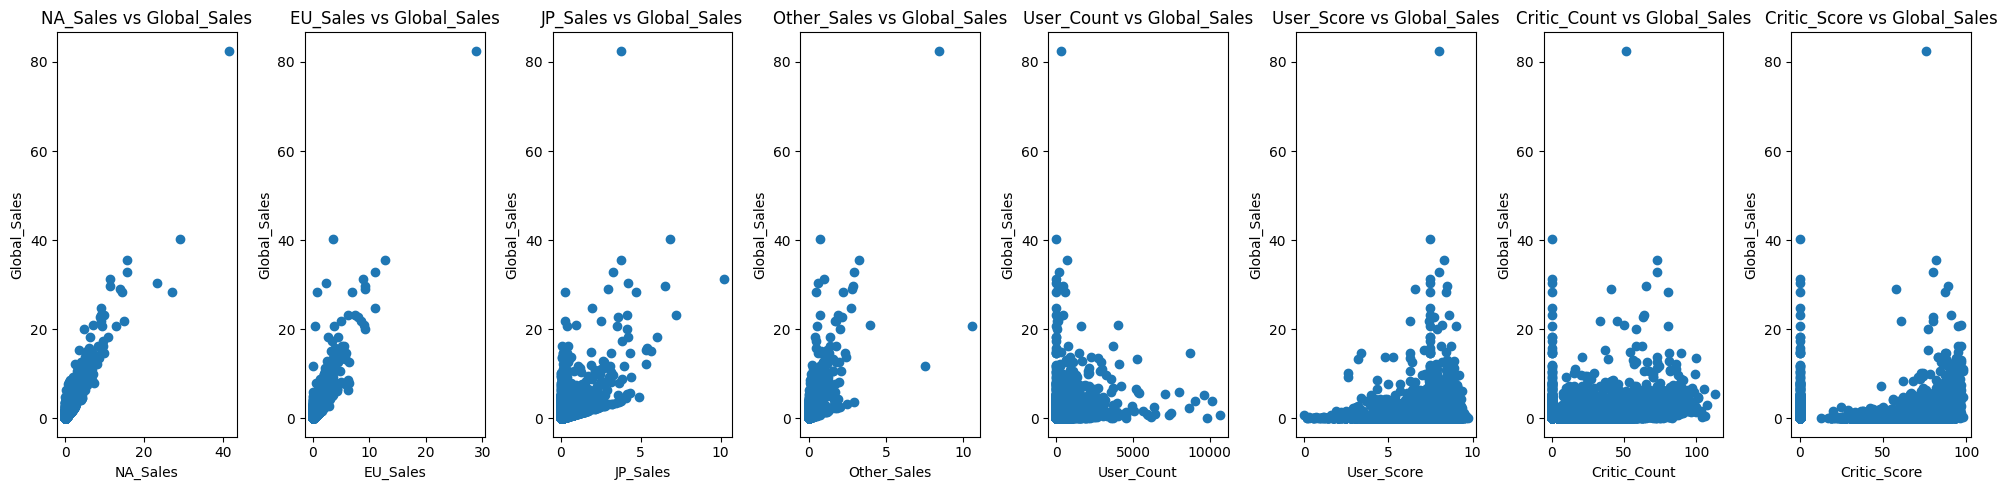

In [39]:
# 2a
x_feat_1 = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "User_Count", "User_Score", "Critic_Count", "Critic_Score"]
y_feat_2 = ["Global_Sales"]

fig, axes = plt.subplots(nrows=1, ncols=len(x_feat_1), figsize=(20, 5))

for o, x_feat in enumerate(x_feat_1):
    axes[o].scatter(vid_gamz_df[x_feat], vid_gamz_df[y_feat_2[0]])
    axes[o].set_xlabel(x_feat)
    axes[o].set_ylabel(y_feat_2[0])
    axes[o].set_title(f'{x_feat} vs {y_feat_2[0]}')
    axes[o].grid(False)

plt.savefig("scatter_plots_target_global_sales.png")

plt.tight_layout()
plt.show()

The relationship is a positive relationship. As NA_Sales increase, Global_Sales also increases. Hence NA_Sales has a posotive relationship ith Global Sales.

EU_Sales increase, Global_Sales also increases. Hence EU_Sales has a posotive relationship ith Global Sales. Relationship is weak. There is little to no relationship

There is no relationship between JP_Sales and Global_Sales. A rise or fall in JP_Sales does not have a direct effect on Global_Sales. As JP-Sales increases we cannot tell if Global_Sales is increasing

There is a positive relationship between Other Sales and Global Sales but not a strong one

There are no relationships between User Score, Critic Score, User Count, Critic Count and Global Sales

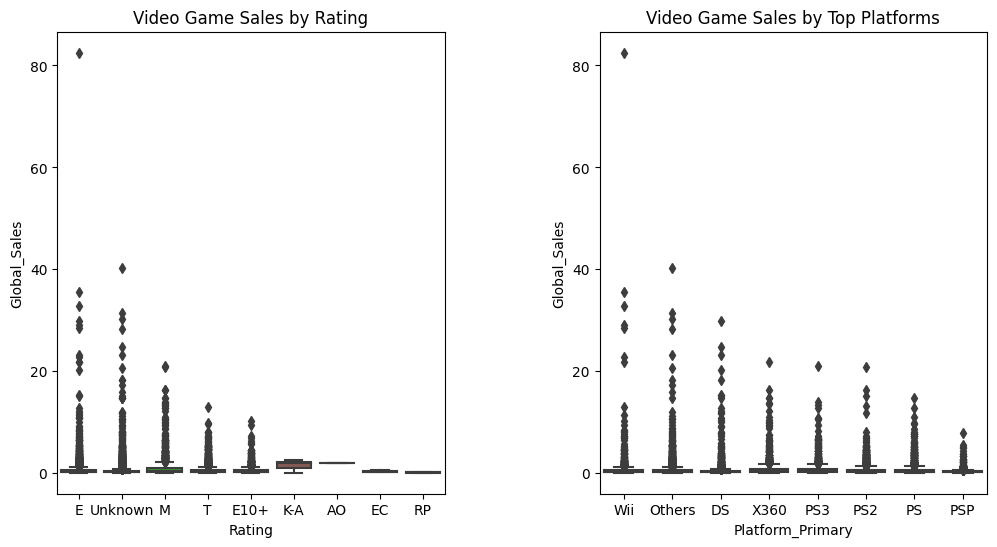

In [40]:
# Create subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plot first boxplot
sns.boxplot(x="Rating", y="Global_Sales", data=vid_gamz_df, ax=axs[0])
axs[0].set_title("Video Game Sales by Rating")

# Plot second boxplot
sns.boxplot(x="Platform_Primary", y="Global_Sales", data=vid_gamz_df, ax=axs[1])
axs[1].set_title("Video Game Sales by Top Platforms")

# Adjust spacing between plots
plt.subplots_adjust(wspace=0.4)

# Save the plot
plt.savefig("boxplots.png", dpi=300)

# Display the plot
plt.show()

There is alot of outliers and the Rating seems to have more sales for videos with E Ratings. Video Games will have a form of contribution

Wii and DS have more contribution to the Global Sales than other named games.There really isnt much different among X360, PS3 and PS2. There are alot of outliers and thes outliers will be treated.


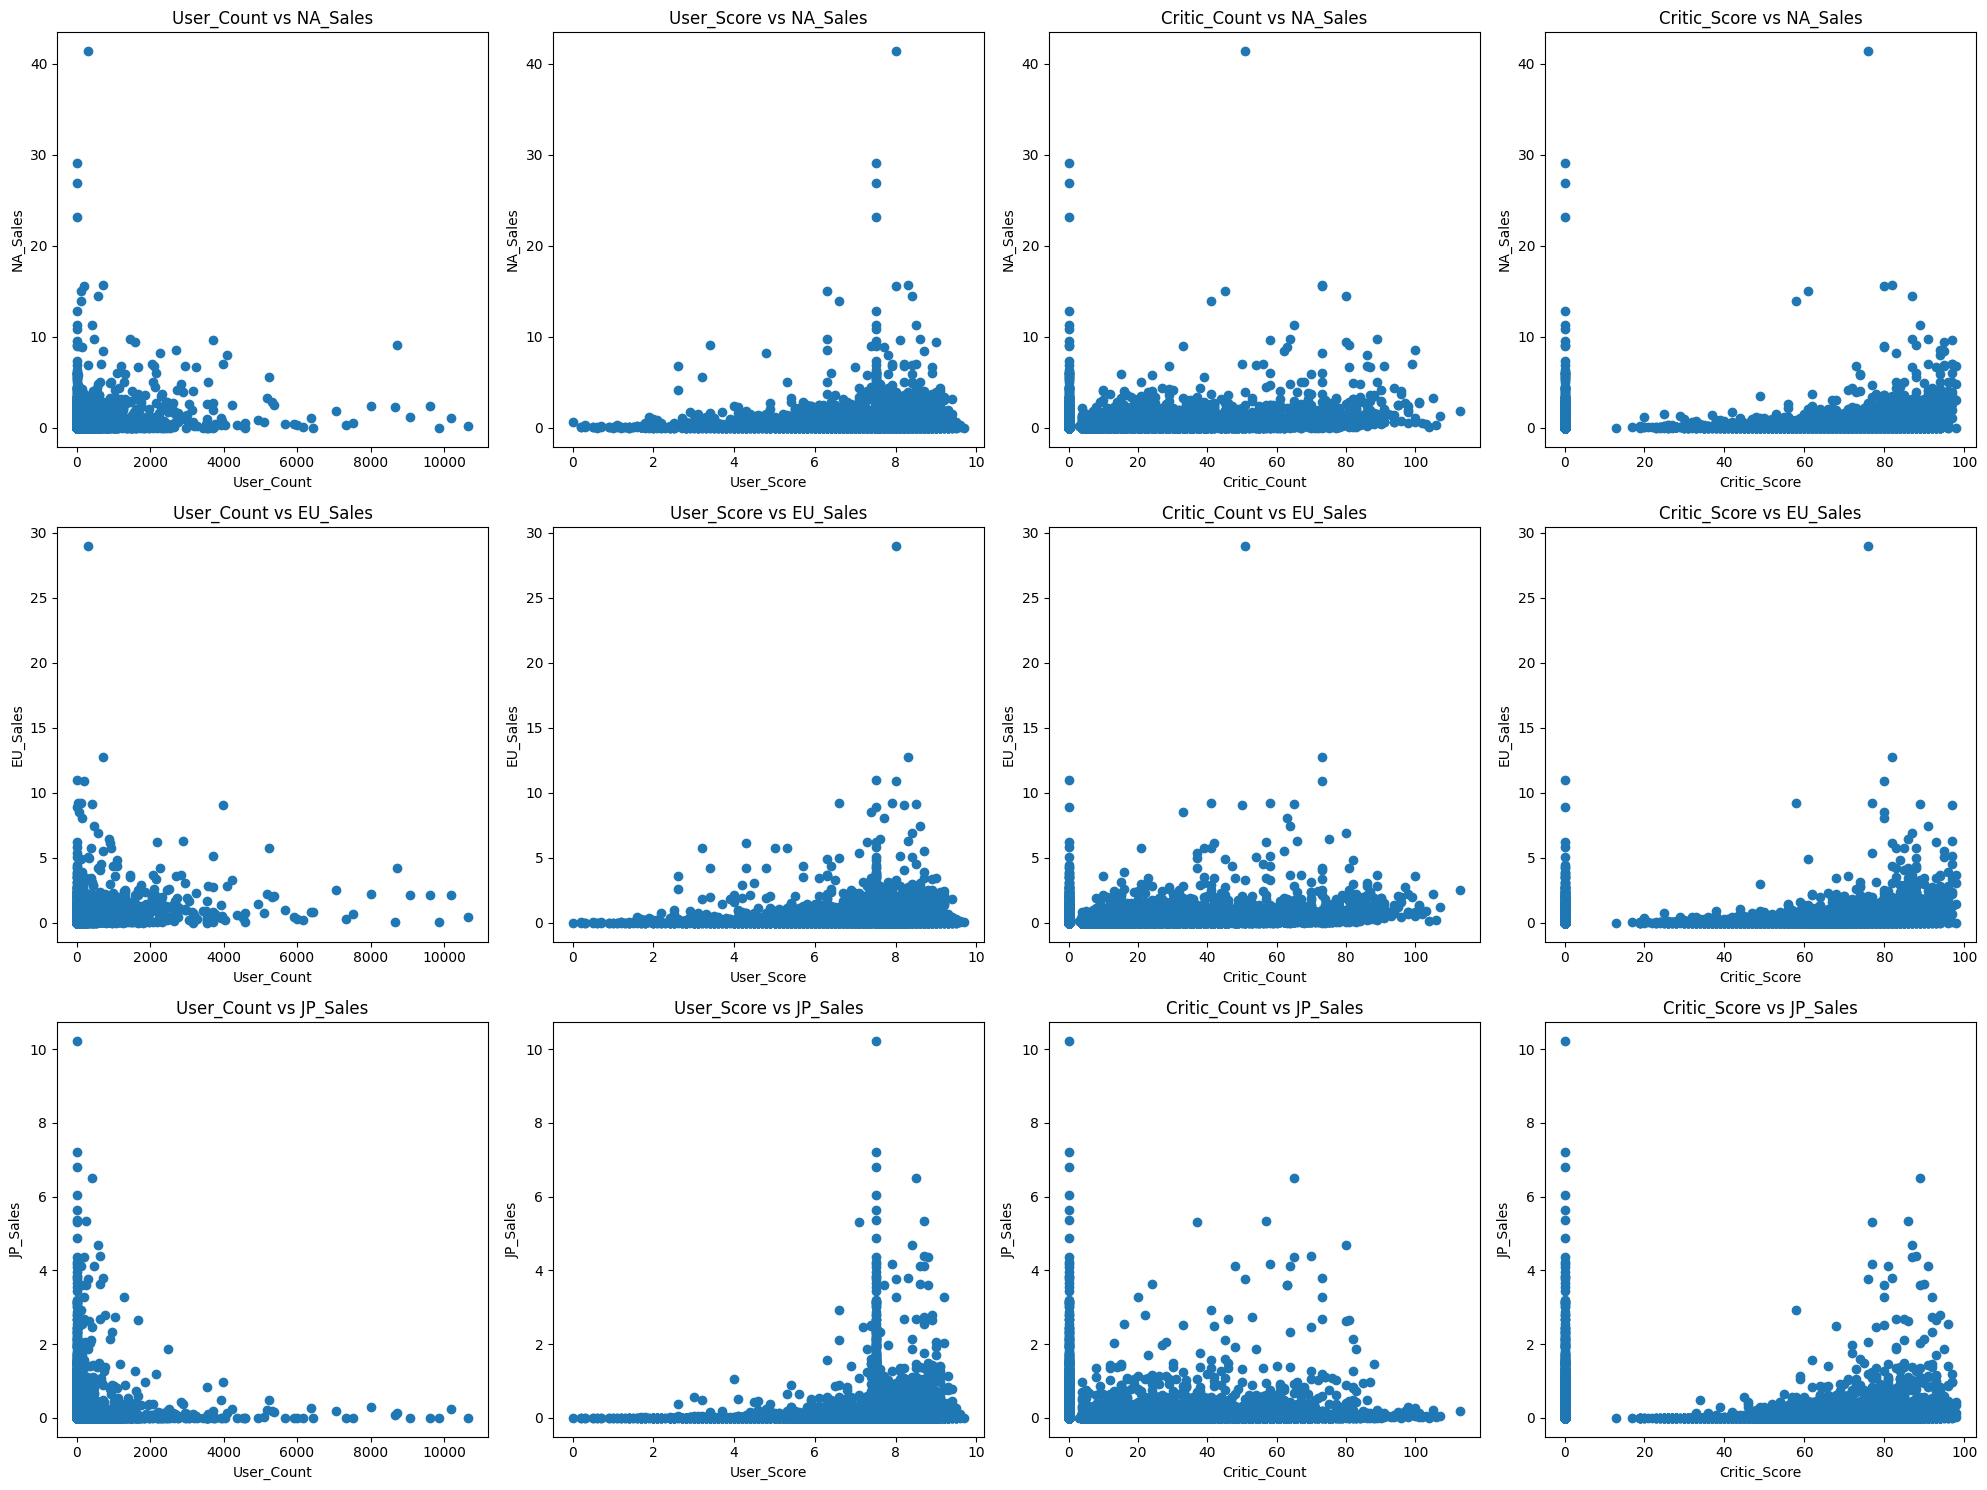

In [41]:
# 2b
x_feat1 = ["User_Count", "User_Score", "Critic_Count", "Critic_Score"]
y_feat2 = ["NA_Sales", "EU_Sales", "JP_Sales"]

fig, axes = plt.subplots(nrows = len(y_feat2), ncols = len (x_feat1), figsize = (20, 15))

for i, y_feat in enumerate(y_feat2):
    for o, x_feat in enumerate(x_feat1):
        axes[i, o].scatter(vid_gamz_df[x_feat],vid_gamz_df[y_feat])
        axes[i, o].set_xlabel(x_feat)
        axes[i, o].set_ylabel(y_feat)
        axes[i, o].set_title(f'{x_feat} vs {y_feat}')
        axes[i, o].grid(False)
plt.savefig("scatter_plots_of_no_correlation.png")                             
plt.tight_layout()
plt.show()   

we cannot establish any positive relattionship among these given features

##  Detecting Outliers and Treatment

In [42]:
# checking outlier

vid_gamz_df["EU_Sales"].describe()

count    16717.000000
mean         0.145010
std          0.503303
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: EU_Sales, dtype: float64

I notice that the max is 28.96 is an outlier as all the figures are below point 1.50% was about 0.02 and 75% was around 0.11.  We will handle the outliers from an angle of boxplot

#### Detecting Outliers

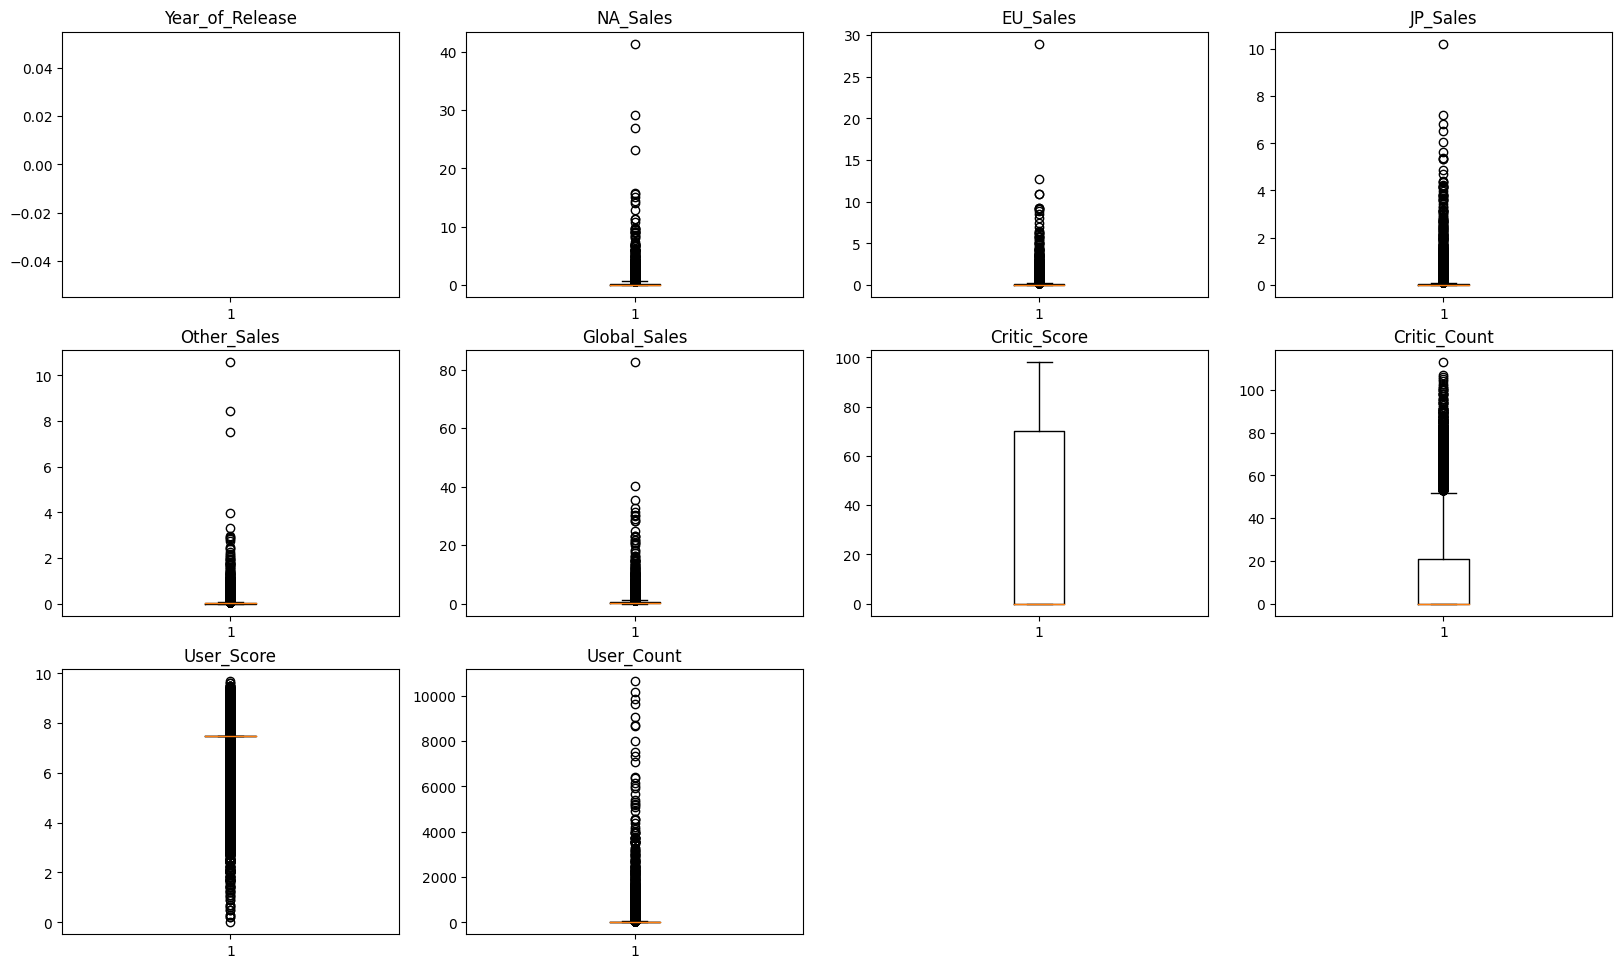

In [43]:
# solutions

# outlier detection using boxplot
plt.figure(figsize = (20, 20))

for i, variable in enumerate (num_data):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(vid_gamz_df[variable])
    plt.title(variable)

plt.savefig("outlier_plots.png")
plt.show()

We are able to visualize all the outliers in the sales. We will treat all the outliers minus the Target which is Global Sales. Critic Score does not have outliers

#### Treating Outliers

In [44]:
num_data.drop("Global_Sales", axis = 1, inplace = True)

num_data.columns

Index(['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'],
      dtype='object')

Global_Sales has been removed from the variables because i do not want to treat the outliers in the Global Sales.

In [45]:
# Function to treat outliers in numerical variables using IQR method
def treat_outliers(vid_gamz_df, col):
    """
    Treat outliers in numerical variables
    df: DataFrame
    col: str, name of the numerical variable
    """
    Q1 = vid_gamz_df[col].quantile(0.25) # first quartile
    Q3 = vid_gamz_df[col].quantile(0.75) # third quartile
    IQR = Q3 - Q1 # interquartile range
    lower_whisker = Q1 - (1.5 * IQR) # calculate lower whisker
    upper_whisker = Q3 + (1.5 * IQR) # calculate upper whisker
    vid_gamz_df[col] = np.clip(vid_gamz_df[col], lower_whisker, upper_whisker) # clip the values of the variable between the lower and upper whisker
    return vid_gamz_df


I used clipping to treat the outlier, any outlier below the lower whisker or upper whiskers were clipped to the the lower and upper whiskers respectively

In [46]:
# Function to treat outliers in all numerical variables of a DataFrame
def treat_outliers_all(vid_gamz_df, col_list):
    """
    Treat outliers in all numerical variables of a DataFrame
    df: DataFrame
    col_list: list of str, names of the numerical variables
    """
    for c in col_list:
        vid_gamz_df = treat_outliers(vid_gamz_df, c)
    return vid_gamz_df

In [47]:
vid_gamz_df = treat_outliers_all(vid_gamz_df, num_data)

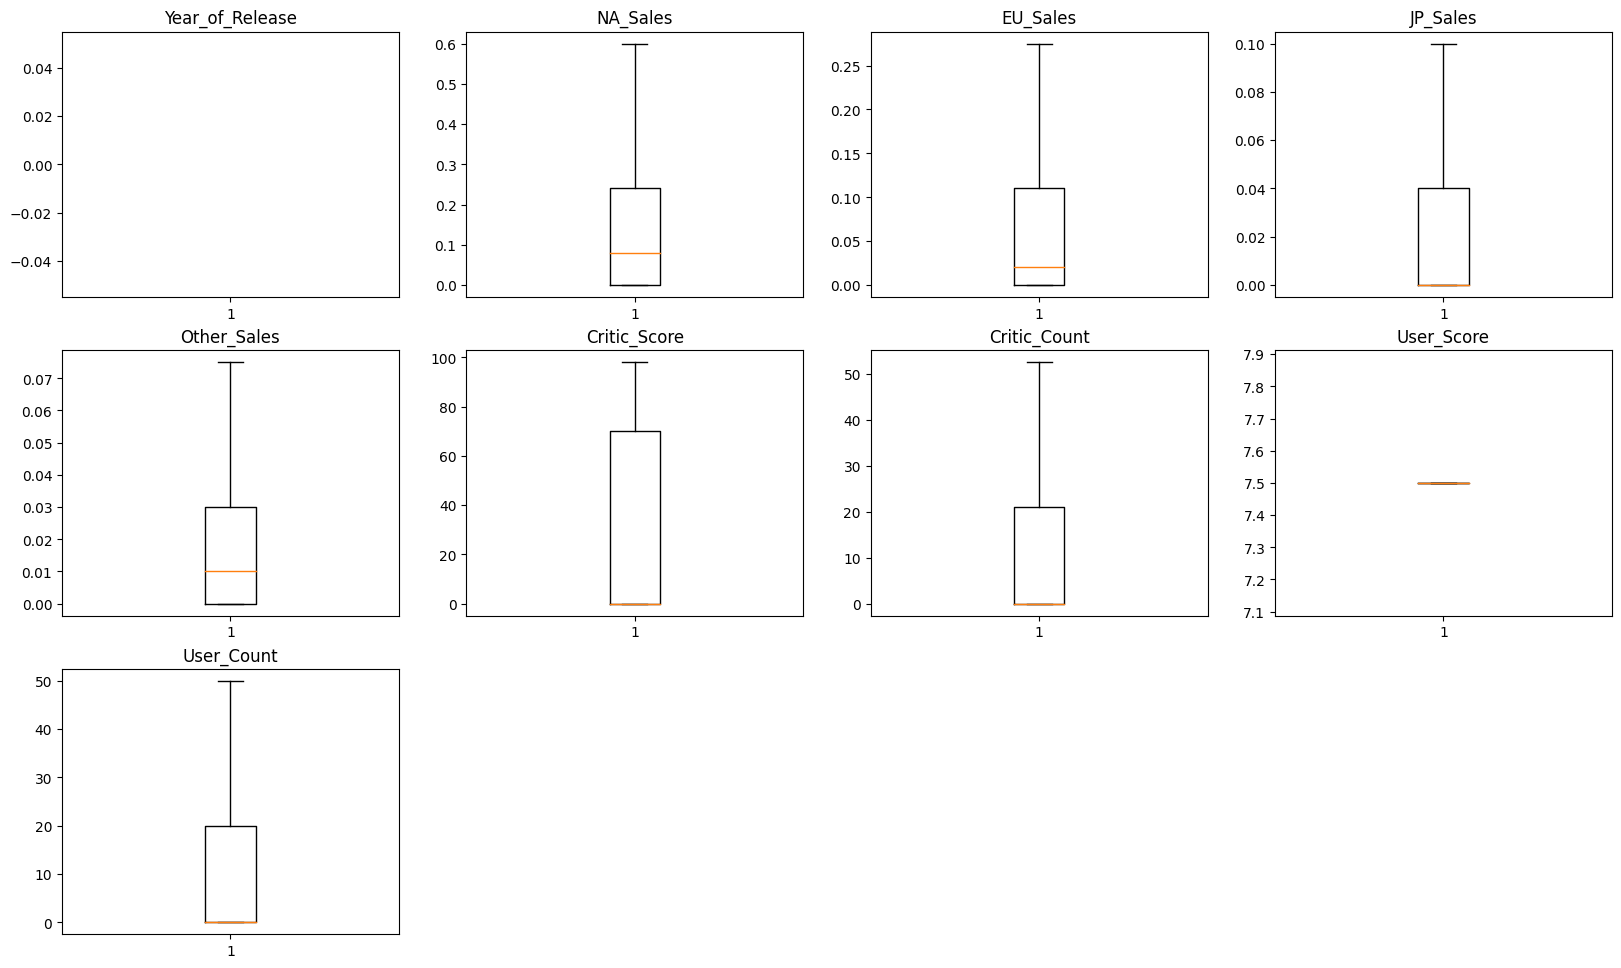

In [48]:
plt.figure(figsize = (20, 20))

for i, variable in enumerate (num_data):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(vid_gamz_df[variable], whis = 1.5)
    plt.title(variable)

plt.savefig("outlier_treated_plots.png")
plt.show()

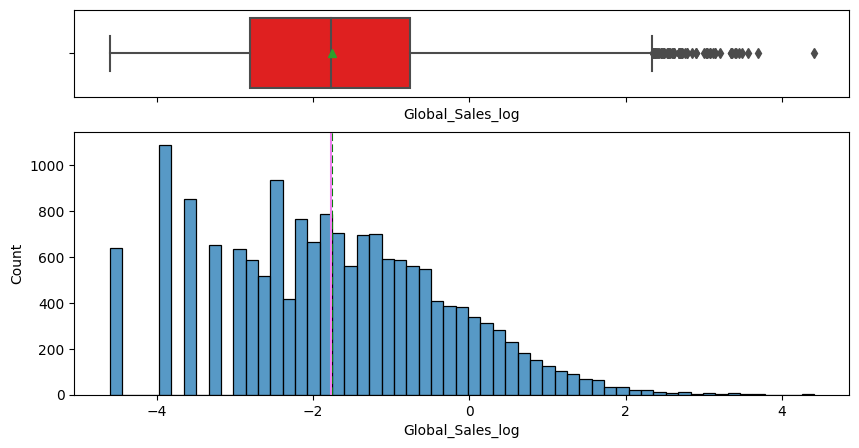

In [49]:
#transform the target using log transformation
vid_gamz_df["Global_Sales_log"] = np.log(vid_gamz_df["Global_Sales"]) +1e-6

histogram_boxplot(data= vid_gamz_df, feature = "Global_Sales_log")

We want to log transform the Target to make the right skewed appropriately normally distributed since the Global_Sales was rightly skewed with its outliers. We can see the Global_Sales distribution is now normal and Global_Sales_log will now be the new target.

The Target was rightly skewed and Target should be approximately Normally Distributed. Global Sales was violating that assumption We use log transfom to convert the right skewedness of the target to be normally distributed. Mean and median are now similar. A variable is right skewed when the mean is far higher than the median

###  Model Building

In [50]:
# We first need to select the features that we want to use
vid_gamz_df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating',
       'Platform_Primary', 'Global_Sales_log'],
      dtype='object')

In [51]:
# Select features and target

x = vid_gamz_df[["Genre", "NA_Sales", "JP_Sales", "EU_Sales", "Other_Sales", "Critic_Count", "Critic_Score", 
                "User_Score", "User_Count", "Rating", "Platform_Primary"]]

y = vid_gamz_df["Global_Sales_log"] # +1e-10

In [52]:
# convert all categorical features to numerical data: OneHotEncoding

x =  pd.get_dummies(x, drop_first= True)

x.head()

,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Critic_Count,Critic_Score,User_Score,User_Count,Genre_Adventure,Genre_Fighting,...,Rating_RP,Rating_T,Rating_Unknown,Platform_Primary_Others,Platform_Primary_PS,Platform_Primary_PS2,Platform_Primary_PS3,Platform_Primary_PSP,Platform_Primary_Wii,Platform_Primary_X360
0,0.6,0.1,0.275,0.075,51.0,76.0,7.5,50.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.6,0.1,0.275,0.075,0.0,0.0,7.5,0.0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,0.6,0.1,0.275,0.075,52.5,82.0,7.5,50.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.6,0.1,0.275,0.075,52.5,80.0,7.5,50.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.6,0.1,0.275,0.075,0.0,0.0,7.5,0.0,0,0,...,0,0,1,1,0,0,0,0,0,0


We use the OneHot Encoder because we have text or object data type in our features and we need to convert them and creates multiple columns. where category occurs 1 is put there and where there is no category 0 is placed there

In [53]:
#Build model
linr_regn_cv = LinearRegression()

kfold = KFold(shuffle= True)

scores = cross_val_score(linr_regn_cv, x, y , cv= kfold, scoring = "r2")

In [54]:
scores

array([0.80651128, 0.82023978, 0.81315495, 0.8132036 , 0.82273437])

In [55]:
# average
np.mean(scores)

0.815168795445152

The model is performed well

### Split the data into training and testing


In [56]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val, test_size = 0.2, random_state = 0)

In [57]:
x_train.shape

(10698, 34)

In [58]:
x_test.shape

(3344, 34)

In [59]:
x_val.shape

(2675, 34)

In [60]:
# Normalize the data
scaler = StandardScaler()# mean of zero and standard deviation of 1

x_train_sd = scaler.fit_transform(x_train)  
x_val_sd = scaler.transform(x_val)
x_test_sd = scaler.transform(x_test)

fit on train calculates mean of zero std of 1 of each of the variables and transform will use the mean and std to transform the data so mean is shifted to 0 and std towards 1. We only transform on the val or test because we do not want to recalculate the mean and std on the validation and or test data. We only do on train test. and this will violate the assumption of Machine Learning

### checking to see if model is underfitting or overfitting

In [61]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions) # compute R-squared
    n = predictors.shape[0] # get the number of observations
    k = predictors.shape[1] # get the number of predictors
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    A function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # calculate performance metrics
    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of performance metrics
    vid_gamz_df_perf = pd.DataFrame({"RMSE": rmse, "MAE": mae, "R-squared": r2, "Adj. R-squared": adjr2, "MAPE": mape}, index=[0])

    return vid_gamz_df_perf

In [62]:
# instantiate the model
linr_regn = LinearRegression()

# fit the model
linr_regn.fit(x_train_sd, y_train)

LinearRegression()

In [63]:
# instantiate the model
ridge_regn = Ridge(random_state=0)

# fit the model
ridge_regn.fit(x_train_sd, y_train)

Ridge(random_state=0)

In [64]:
alpha_values = np.linspace(0.2,10, num = 10)
for alpha in alpha_values:
    ridge = Ridge(random_state=0, alpha = alpha)
    ridge.fit(x_train_sd, y_train)
    ridge_train = model_performance_regression(ridge, x_train_sd,y_train)
    print(ridge_train)
    print(alpha)

       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.626628  0.492836   0.817138        0.816555  82388.305866
0.2
       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.626628  0.492831   0.817138        0.816555  82370.637594
1.288888888888889
       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.626628  0.492826   0.817138        0.816555  82352.977276
2.377777777777778
       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.626628  0.492822   0.817138        0.816555  82335.324904
3.4666666666666672
       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.626628  0.492817   0.817138        0.816555  82317.680473
4.555555555555556
       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.626629  0.492812   0.817138        0.816555  82300.043974
5.644444444444445
       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.626629  0.492807   0.817138        0.816555  82282.415397
6.733333333333334
     

In [65]:
# instantiate the model
lasso_regn = Lasso(random_state=0)

#fit the model
lasso_regn.fit(x_train_sd, y_train)

Lasso(random_state=0)

In [66]:
alpha_values = np.linspace(0.001,0.2,  num = 10)

for alpha in alpha_values:
    lasso = Lasso(random_state=0, alpha = alpha)
    lasso.fit(x_train_sd, y_train)
    lasso_train = model_performance_regression(lasso, x_train_sd,y_train)
    print(lasso_train)
    print(alpha)

       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.626676  0.492902    0.81711        0.816527  82078.269554
0.001
       RMSE      MAE  R-squared  Adj. R-squared          MAPE
0  0.635935  0.49904   0.811666        0.811066  76377.392211
0.023111111111111114
       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.645434  0.503733   0.805998        0.805379  73970.824258
0.045222222222222226
       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.655104  0.507662   0.800141        0.799504  72315.580505
0.06733333333333334
       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.662855  0.509883   0.795384        0.794732  69285.988985
0.08944444444444445
      RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.67257  0.513413   0.789342         0.78867  66225.854567
0.11155555555555556
       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.683139  0.517676   0.782669        0.781976  63123.095357
0.133666666666

In [67]:
#### Model Performance Check

adj_r2 penalizes data for irrelevant features and r2 takes whole data irrespective of the irrelavant features. R2 measures the variation or changes in that target being explained by the variables in the data. measures how well the model fits to the data. the higher the value the more the model is performing. Adjusted is more reliable

###### Interprete Model Performance and Coefficients

In [68]:
# check performance of linear regression on train data
linr_regn_train = model_performance_regression(linr_regn, x_train_sd, y_train)
linr_regn_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.626628,0.492837,0.817138,0.816555,82391.496942


In [69]:
# check performance of linear regression on validation data
linr_regn_val = model_performance_regression(linr_regn, x_val_sd, y_val)
linr_regn_val

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.635793,0.497694,0.808651,0.806186,125180.764115


In [70]:
# check performance of ridge regression on train data
ridge_regn_train = model_performance_regression(ridge_regn, x_train_sd, y_train)
ridge_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.626629,0.492793,0.817138,0.816555,82229.577127


In [71]:
# check performance of ridge regression on validation data
ridge_regn_val = model_performance_regression(ridge_regn, x_val_sd, y_val)
ridge_regn_val

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.635796,0.497692,0.808649,0.806185,125163.0072


Ridge did not improve linear regression 

In [72]:
# check performance of lasso regression on train data
lasso = Lasso(random_state=0, alpha = 0.001)
lasso.fit(x_train_sd, y_train)
lasso_train = model_performance_regression(lasso, x_train_sd,y_train)
lasso_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.626676,0.492902,0.81711,0.816527,82078.269554


In [73]:
# check performance of lasso regression on validation data
lasso_regn_val = model_performance_regression(lasso, x_val_sd, y_val)
lasso_regn_val

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.635632,0.497801,0.808748,0.806285,124343.485558


In [74]:
print(linr_regn.coef_)

print(x_train.columns)

[ 6.63733409e-01  4.34435427e-01  2.54944777e-01  4.31827631e-01
  2.99193520e-02  1.68331685e-02 -1.61002853e+09 -1.36257365e-01
 -7.89951832e-02  2.55141907e-03  2.90154081e-02  7.02108392e-03
 -1.42436569e-02  1.25087538e-02  1.89995222e-02 -1.11303337e-03
  7.50309501e-03  5.17097310e-02 -9.88520888e-03  3.10920415e+09
  2.05302667e+09  1.73117295e+08  7.06913632e+07  2.12181616e+09
  9.99680114e+07  2.80197158e+09  3.58839608e+09  8.61722990e-02
  1.16982720e-02  5.19833832e-03 -2.25656601e-02 -4.86720843e-02
  1.90740934e-02  2.85584108e-02]
Index(['NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales', 'Critic_Count',
       'Critic_Score', 'User_Score', 'User_Count', 'Genre_Adventure',
       'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle',
       'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
       'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Rating_E',
       'Rating_E10+', 'Rating_EC', 'Rating_K-A', 'Rating_M', 'Rating_RP',
       'Rating_T', '

In [75]:
# do on the class project
# NA sales
np.exp(6.63733409e-01)

1.9420292062117608

For one unit sale of video games in NA , Global sales will increase by 1.94 times

In [76]:
# observe the coefficients of the linear regression

for i , col in enumerate(x_train.columns):
        print(f"{col} has coefficient of {np.exp(linr_regn.coef_[i])}")

NA_Sales has coefficient of 1.9420292060121105
JP_Sales has coefficient of 1.5440910608264096
EU_Sales has coefficient of 1.2903903591061883
Other_Sales has coefficient of 1.5400696317856348
Critic_Count has coefficient of 1.0303714332216283
Critic_Score has coefficient of 1.0169756445834766
User_Score has coefficient of 0.0
User_Count has coefficient of 0.8726180224538206
Genre_Adventure has coefficient of 0.9240443753260403
Genre_Fighting has coefficient of 1.0025546767115918
Genre_Misc has coefficient of 1.0294404560697936
Genre_Platform has coefficient of 1.0070457895201281
Genre_Puzzle has coefficient of 0.9858573040893183
Genre_Racing has coefficient of 1.0125873154821183
Genre_Role-Playing has coefficient of 1.019181161630764
Genre_Shooter has coefficient of 0.9988875858228361
Genre_Simulation has coefficient of 1.0075313137637096
Genre_Sports has coefficient of 1.053070024515978
Genre_Strategy has coefficient of 0.9901634892016405
Rating_E has coefficient of inf
Rating_E10+ has

C:\Users\SERWAH\AppData\Local\Temp\ipykernel_23748\3352263784.py:4: RuntimeWarning: overflow encountered in exp
  print(f"{col} has coefficient of {np.exp(linr_regn.coef_[i])}")


In [77]:
# observe the coefficients of the ridge regression
for i, col in enumerate(x_train.columns):
    print(f"{col} has coefficient of {np.exp(ridge_regn.coef_[i])}")


NA_Sales has coefficient of 1.9418654022622746
JP_Sales has coefficient of 1.5440032862271047
EU_Sales has coefficient of 1.2904576693912795
Other_Sales has coefficient of 1.5400038846771043
Critic_Count has coefficient of 1.030361828816995
Critic_Score has coefficient of 1.0169807605389087
User_Score has coefficient of 1.0
User_Count has coefficient of 0.8726875197487213
Genre_Adventure has coefficient of 0.924039691977169
Genre_Fighting has coefficient of 1.0025592385358004
Genre_Misc has coefficient of 1.029434601339271
Genre_Platform has coefficient of 1.007050003554672
Genre_Puzzle has coefficient of 0.9858558265229309
Genre_Racing has coefficient of 1.0125823983917812
Genre_Role-Playing has coefficient of 1.0191814900252052
Genre_Shooter has coefficient of 0.9988865127092539
Genre_Simulation has coefficient of 1.0075298896326055
Genre_Sports has coefficient of 1.0530656720680274
Genre_Strategy has coefficient of 0.9901561909513156
Rating_E has coefficient of 1.0226309143860801
Ra

In [78]:
# instantiate the model
reg = LinearRegression()

# build the forward feature selection
sfs = SFS(reg, k_features = x_train.shape[1], forward = True, verbose = 2, scoring = "r2", n_jobs = -1)

# fit the model
sfs = sfs.fit(x_train_sd, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    4.4s finished

[2023-05-04 14:53:39] Features: 1/34 -- score: 0.6559829381143203[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.1s finished

[2023-05-04 14:53:39] Features: 2/34 -- score: 0.7318384591400294[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.1s finished

[2023-05-04 14:53:40] Features: 3/34 -- score: 0.7913518475277262[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.2s finished

[2023-05-04 14:53:40] Features: 4/34 -- score: 0.8004775904405645[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished



[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished

[2023-05-04 14:53:53] Features: 30/34 -- score: 0.8159865468844085[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished

[2023-05-04 14:53:53] Features: 31/34 -- score: 0.8159626515478685[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished

[2023-05-04 14:53:54] Features: 32/34 -- score: 0.8158960465454059[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s finished

[2023-05-04 14:53:54] Features: 33/34 -- sc

### Visualise the model performance with the addition of each feature

In [79]:
sfs.get_metric_dict()

{1: {'feature_idx': (0,),
  'cv_scores': array([0.65636455, 0.63577781, 0.67676893, 0.65221357, 0.65878984]),
  'avg_score': 0.6559829381143203,
  'feature_names': ('0',),
  'ci_bound': 0.016881278719882042,
  'std_dev': 0.01313420835659012,
  'std_err': 0.006567104178295059},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([0.7263275 , 0.71854898, 0.74021731, 0.74129158, 0.73280692]),
  'avg_score': 0.7318384591400294,
  'feature_names': ('0', '1'),
  'ci_bound': 0.011018854268273204,
  'std_dev': 0.008573042967411761,
  'std_err': 0.0042865214837058815},
 3: {'feature_idx': (0, 1, 3),
  'cv_scores': array([0.79139301, 0.77802755, 0.79412052, 0.80380332, 0.78941484]),
  'avg_score': 0.7913518475277262,
  'feature_names': ('0', '1', '3'),
  'ci_bound': 0.010660871188877086,
  'std_dev': 0.008294519969779793,
  'std_err': 0.0041472599848898966},
 4: {'feature_idx': (0, 1, 2, 3),
  'cv_scores': array([0.80272468, 0.78506594, 0.80543719, 0.80773095, 0.80142919]),
  'avg_score': 0.8004775

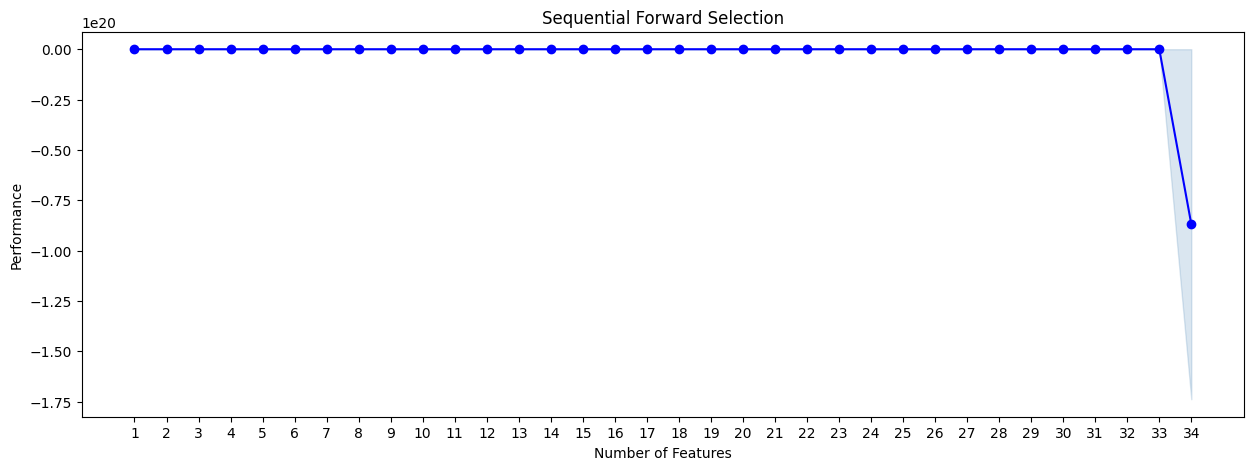

In [80]:
# Plotting the performance of the features
fig1= plot_sfs(sfs.get_metric_dict(), kind = "std_err", figsize = (15,5))
plt.title("Sequential Forward Selection")

plt.show()

#### Rebuild the model with selected features

In [81]:
# build the forward feature selection
# selecting best performing features
sfs = SFS(reg, k_features= 13, forward= True, verbose= 2, scoring= "r2",n_jobs = -1)

sfs = sfs.fit(x_train_sd,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.2s finished

[2023-05-04 14:53:56] Features: 1/13 -- score: 0.6559829381143203[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  33 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.3s finished

[2023-05-04 14:53:56] Features: 2/13 -- score: 0.7318384591400294[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.3s finished

[2023-05-04 14:53:57] Features: 3/13 -- score: 0.7913518475277262[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.3s finished

[2023-05-04 14:53:57] Features: 4/13 -- score: 0.8004775904405645[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent 

I can argue that the first feature which is North America Sales performed best because the first feature alone contributed to 65%

In [82]:
list(sfs.k_feature_names_)

['0', '1', '2', '3', '4', '7', '8', '10', '17', '26', '27', '30', '31']

In [83]:
# important features
feat_cols = list(sfs.k_feature_idx_)

x_train.columns[feat_cols]

Index(['NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales', 'Critic_Count',
       'User_Count', 'Genre_Adventure', 'Genre_Misc', 'Genre_Sports',
       'Rating_Unknown', 'Platform_Primary_Others', 'Platform_Primary_PS3',
       'Platform_Primary_PSP'],
      dtype='object')

In [84]:
# important features
feat_cols = list(sfs.k_feature_idx_)

x_train2 =x_train[x_train.columns[feat_cols]]
x_test2 = x_test[x_test.columns[feat_cols]]
x_val2 = x_val[x_val.columns[feat_cols]]

In [85]:
# renormalizing the original data
x_train2_sd = scaler.fit_transform(x_train2)
x_val2_sd = scaler.transform(x_val2)
x_test2_sd = scaler.transform(x_test2)

In [86]:
# re-build the linear regression

lin_reg2 = LinearRegression()

lin_reg2.fit(x_train2_sd, y_train)

LinearRegression()

In [87]:
reg2_train = model_performance_regression(lin_reg2, x_train2_sd, y_train)
reg2_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.628587,0.494675,0.815993,0.815769,82219.596222


Similar to what we previously had just by using the 13 features

In [88]:
reg2_val = model_performance_regression(lin_reg2, x_val2_sd, y_val)
reg2_val

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.634355,0.499446,0.809516,0.808585,122732.756699


Performance improved better when we used 13 features as compared with prevous using R-squared. The 13 features here are well contributing than the 34 features

To be sure the model does not overfit we now pass in the test data

In [89]:
reg2_test = model_performance_regression(lin_reg2, x_test2_sd, y_test)
reg2_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.627779,0.497191,0.817345,0.816632,29840.227549


We see that on the test set based on the R-squared and Adjusted R squared our model is doing better. It is generalizing well using the best 13 features

In [90]:
#### To make predictions

## Tree- based Method - non linear models

- For these models we do not need to normalise the data. Hence we will use the original  train, validation and test data.

- They do not need to satisfy the assumptions of linear regression. There is nothing about linearity, independence, multicollinearity. The do not use distance. They use the variable directly 

- Solution a and c for question 2

In [91]:
rf= RandomForestRegressor(random_state= 0)#, max_depth= 4)

rf.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [92]:
rf_train = model_performance_regression(rf,x_train, y_train)
rf_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.181455,0.073942,0.984666,0.984618,18946.061904


In [93]:
rf_val = model_performance_regression(rf, x_val, y_val)
rf_val

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.279325,0.141019,0.963067,0.962591,62527.390221


Performance on validation set reduced though difference is not much. Hence model is still performing well on the test set at 96%

In [94]:
rf= RandomForestRegressor(random_state= 0, max_depth= 4)

rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, random_state=0)

In [95]:
rf_train = model_performance_regression(rf,x_train, y_train)
rf_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.482122,0.35687,0.891753,0.891408,62449.812523


In [96]:
rf_val = model_performance_regression(rf, x_val, y_val)
rf_val

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.488577,0.362489,0.887005,0.88555,116637.800254


### Visualize the Feature Importance by Random Forest Model

- To get the level of importance of each feature

In [97]:
feature_names = x_train.columns.to_list()
feature_names

['NA_Sales',
 'JP_Sales',
 'EU_Sales',
 'Other_Sales',
 'Critic_Count',
 'Critic_Score',
 'User_Score',
 'User_Count',
 'Genre_Adventure',
 'Genre_Fighting',
 'Genre_Misc',
 'Genre_Platform',
 'Genre_Puzzle',
 'Genre_Racing',
 'Genre_Role-Playing',
 'Genre_Shooter',
 'Genre_Simulation',
 'Genre_Sports',
 'Genre_Strategy',
 'Rating_E',
 'Rating_E10+',
 'Rating_EC',
 'Rating_K-A',
 'Rating_M',
 'Rating_RP',
 'Rating_T',
 'Rating_Unknown',
 'Platform_Primary_Others',
 'Platform_Primary_PS',
 'Platform_Primary_PS2',
 'Platform_Primary_PS3',
 'Platform_Primary_PSP',
 'Platform_Primary_Wii',
 'Platform_Primary_X360']

In [98]:
importances = rf.feature_importances_
importances

array([7.26563099e-01, 1.12942906e-01, 2.86694460e-02, 1.31672868e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.50072730e-04,
       0.00000000e+00, 1.60766173e-06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

The higher the value the more important that feature is

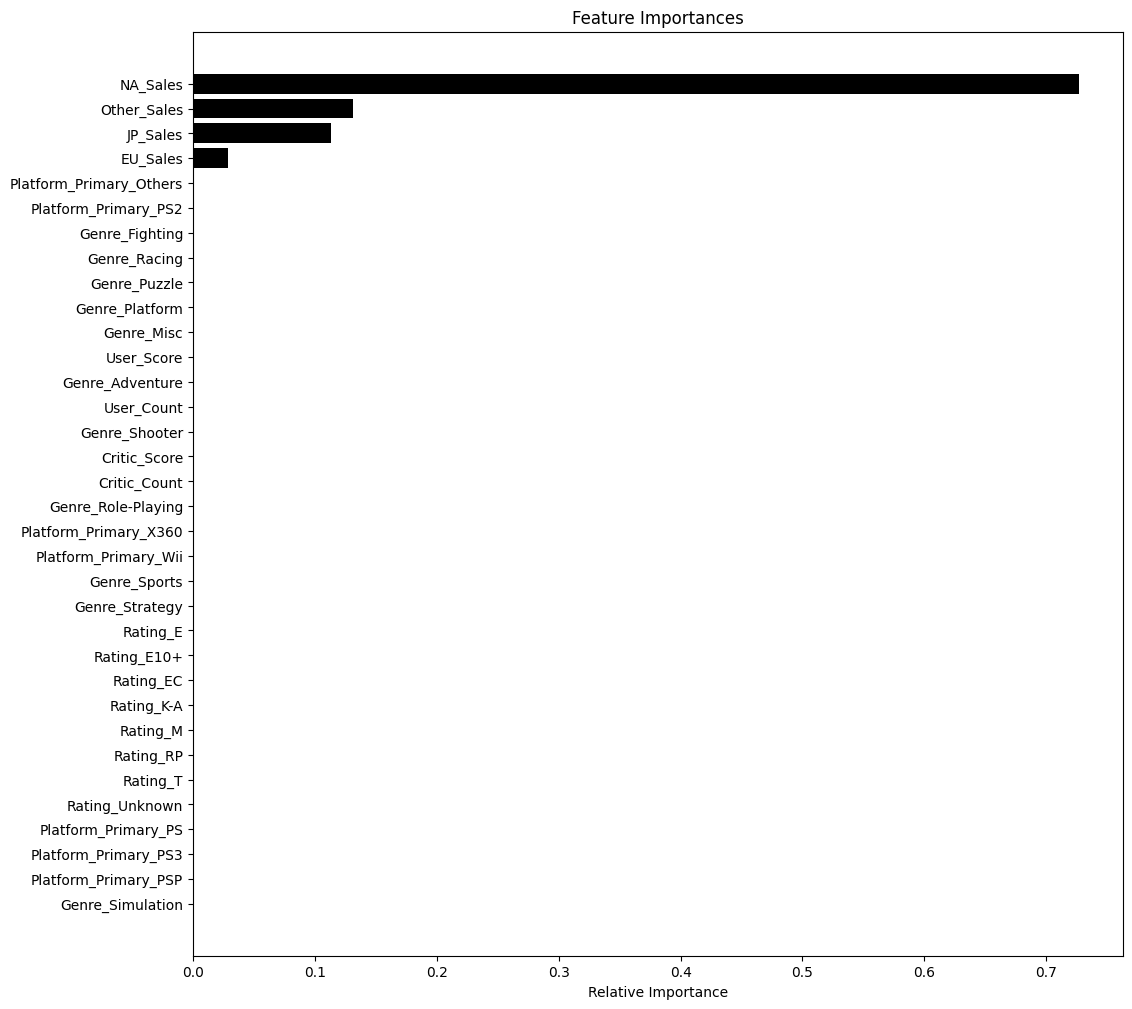

In [99]:
# Plot the feature importance
# importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color = "black", 
         align = "center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

NA_Sales contributed the most followed by Japan_Sales, then Other_Sales and sales in Europe. There is little contribution from Critic score, Critic Count, Platform Primary.

But the top four are the NA_Sales, Japan_Sales, Other_Sales and EU_Sales

### Gradient Boosting

In [100]:
gb = GradientBoostingRegressor(random_state= 0)

gb.fit(x_train, y_train)

GradientBoostingRegressor(random_state=0)

In [101]:
gb_train = model_performance_regression(gb,x_train, y_train)
gb_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.281719,0.163248,0.96304,0.962922,37602.337554


In [102]:
gb_val = model_performance_regression(gb, x_val, y_val)
gb_val

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.296072,0.173273,0.958506,0.957971,78886.305011


This particular model is more relible than the Random Forest

### Visualise the Feature Importance by Gradient Boosting - solution c

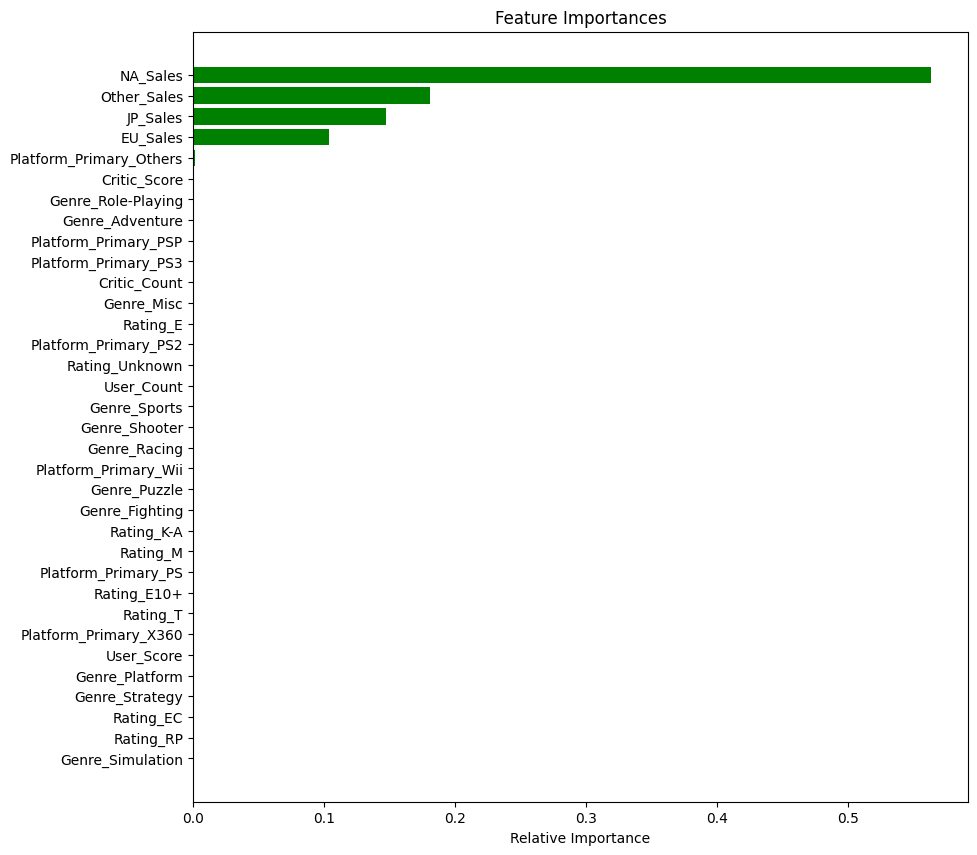

In [103]:
importances = gb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color = "green", 
         align = "center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")

# Save plot as PNG file in tight bounding box
plt.savefig('feature_importances.png', bbox_inches='tight')

plt.show()

The Gradient Boosting model picked the top four features judged by Rand.

Solution 2a - I table Linear Regression, Lasso Regression, Ridge Regression, Random Forest Regressor and Gradient Boosting Regressor,  Using the R2 figures in all of these models i choose Gradient Boosting Regressor since it gave me the highest R2 squared and performed better and incorporation of feature importance attributes. It gave which variables are performing well

For simplicity i will decided on Linear Regression but due to the fact that we could not detect which of the variables that were actually contributing well because of the assumption of indepences and the violation of Multicollinearity,  we had to fall on Sequential Feature selection to select the variable.  

### Classification
- solution d

y train will change since we can use that target (Global sales) we using rating, genre or platform_primary we created, 

In [104]:
# checking value count for Rating
vid_gamz_df["Rating"].value_counts()

Unknown    6767
E          3991
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: Rating, dtype: int64

In [105]:
# checking value count for Platform Primary
vid_gamz_df["Platform_Primary"].value_counts()

Others    4593
DS        2672
PS2       2161
PS        2022
Wii       1467
PS3       1331
X360      1262
PSP       1209
Name: Platform_Primary, dtype: int64

I created the Platform Primary at the Data Cleaning stage and may want to use it as a target for this purpose

In [106]:
# checking value count for genre
vid_gamz_df["Genre"].value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

## We choose Rating as the relevant Categorical variable to be used as target

In [107]:
# Select features and target- Rating

x= vid_gamz_df[["Genre", "NA_Sales", "JP_Sales", "EU_Sales", "Other_Sales", "Critic_Count", "Critic_Score", "User_Score", "User_Count", "Platform_Primary","Global_Sales"]]

y= vid_gamz_df["Rating"]

In [108]:
# select data based on most frequent ratings ["E", "T", "M","E10+"]
new_vid_gamz_df= vid_gamz_df[vid_gamz_df["Rating"].isin(["E","T","M","E10+"])]

We drop unknown because it was the missing value filled

In [109]:
# sanity check
new_vid_gamz_df["Rating"].value_counts()

E       3991
T       2961
M       1563
E10+    1420
Name: Rating, dtype: int64

In [110]:
new_vid_gamz_df.shape

(9935, 18)

We choose Rating as the relevant Categorical variable to be used as target

In [111]:
# Select features and target

x= new_vid_gamz_df[["Genre", "NA_Sales", "JP_Sales", "EU_Sales", "Other_Sales", "Critic_Count", "Critic_Score", "User_Score", "User_Count", "Platform_Primary","Global_Sales"]]

y= new_vid_gamz_df["Rating"]

In [112]:
# OneHotEncoding on selected bfeatures
x_new = pd.get_dummies(x, drop_first = True)

In [113]:
# encoding the target
le= LabelEncoder()

y_new = le.fit_transform(y) # TRANSFORMING OUR RATING

In [114]:
Counter(y_new)

Counter({0: 3991, 2: 1563, 3: 2961, 1: 1420})

In [115]:
# split data
x_train_val, x_test, y_train_val, y_test = train_test_split(x_new,y_new, test_size = 0.2, random_state = 0)
x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val, test_size = 0.2, random_state = 0)

In [116]:
#train the random forest classifier model
rf_clf = RandomForestClassifier(random_state= 0)

# train the model
rf_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [117]:
# function to compute different metrics to check performance of a regression model
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check regression model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)  # to compute acuracy
    recall = recall_score(target, pred_class, average = "weighted")  # to compute recall
    precision = precision_score(target, pred_class, average="weighted")  # to compute precision
    f1 = f1_score(target, pred_class, average="weighted")  # to compute F1 score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1
        },
        index=[0])
    conf = confusion_matrix(target, pred_class)
    plt.figure(figsize=(8, 5))
    sns.heatmap(conf, annot=True, fmt="g")
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.show()
 
    return df_perf

C:\Users\SERWAH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


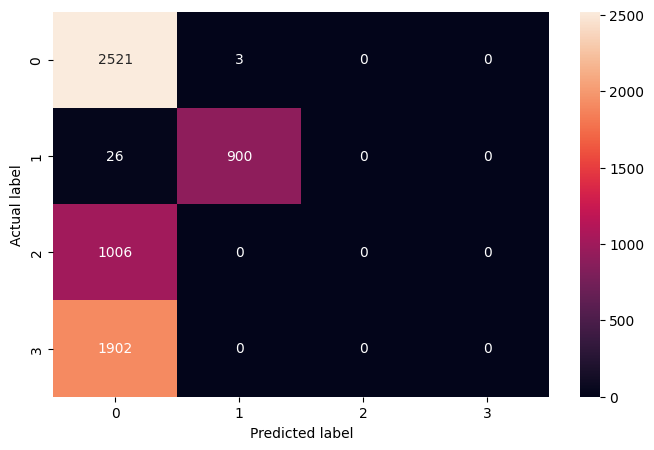

,Accuracy,Recall,Precision,F1-score
0,0.538062,0.538062,0.328622,0.394189


In [118]:
rf_train_cls = model_performance_classification(rf_clf, x_train, y_train)
rf_train_cls

The result is poor. Out of the original Ratings that we have the model was only able to get 53.8% correctly on Recall. For Precision out of all the predictions the model made, the model is only able to get 32.8% correctly.

On the confusion matrix, the correct ones are the ones in the diagonal, say 0 to 0, 1 to 1. None of M and E10+ were predicted correctly, 1006 of the video game with Rating 2 was wrongly predicted to have whatever E was to be. 1902 of E10+ was also wrongly predicted to have E Rating, 26 of video games with T Rating was wrongly predicted to have E. Model is struggling to understand the video games that fall into M and T Rating categories as ones with E Ratings

C:\Users\SERWAH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


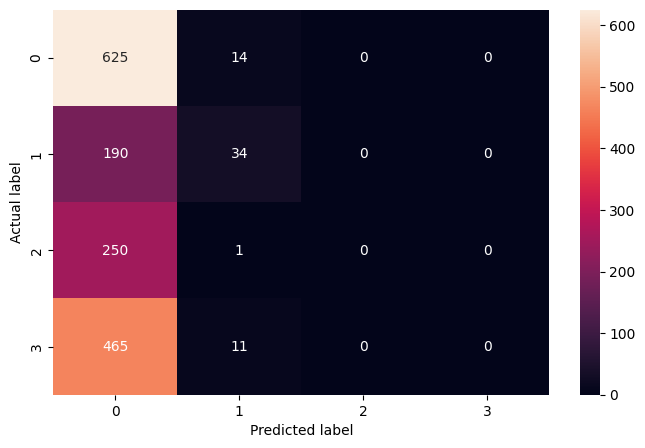

,Accuracy,Recall,Precision,F1-score
0,0.414465,0.414465,0.244002,0.26534


In [119]:
rf_val_cls = model_performance_classification(rf_clf, x_val, y_val)
rf_val_cls

The model is overfitting, Accuracy on validation is poor. That of training is very higher than the validation. Model not doing well but doing well on training compared to validation.

## We choose Genre as the relevant Categorical variable to be used as target

In [120]:
# Select features and target

x= vid_gamz_df[["Rating", "NA_Sales", "JP_Sales", "EU_Sales", "Other_Sales", "Critic_Count", "Critic_Score", "User_Score", "User_Count", "Platform_Primary","Global_Sales"]]

y= vid_gamz_df["Genre"]

In [121]:
# Select features and target - Genre

x1= new_vid_gamz_df[["Rating", "NA_Sales", "JP_Sales", "EU_Sales", "Other_Sales", "Critic_Count", "Critic_Score", "User_Score", "User_Count", "Platform_Primary","Global_Sales"]]

y1= new_vid_gamz_df["Genre"]

In [122]:
# OneHotEncoding on selected bfeatures
x1_new = pd.get_dummies(x, drop_first = True)
x1_new

,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Critic_Count,Critic_Score,User_Score,User_Count,Global_Sales,Rating_E,...,Rating_RP,Rating_T,Rating_Unknown,Platform_Primary_Others,Platform_Primary_PS,Platform_Primary_PS2,Platform_Primary_PS3,Platform_Primary_PSP,Platform_Primary_Wii,Platform_Primary_X360
0,0.60,0.10,0.275,0.075,51.0,76.0,7.5,50.0,82.53,1,...,0,0,0,0,0,0,0,0,1,0
1,0.60,0.10,0.275,0.075,0.0,0.0,7.5,0.0,40.24,0,...,0,0,1,1,0,0,0,0,0,0
2,0.60,0.10,0.275,0.075,52.5,82.0,7.5,50.0,35.52,1,...,0,0,0,0,0,0,0,0,1,0
3,0.60,0.10,0.275,0.075,52.5,80.0,7.5,50.0,32.77,1,...,0,0,0,0,0,0,0,0,1,0
4,0.60,0.10,0.275,0.075,0.0,0.0,7.5,0.0,31.37,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16712,0.00,0.01,0.000,0.000,0.0,0.0,7.5,0.0,0.01,0,...,0,0,1,0,0,0,1,0,0,0
16713,0.00,0.00,0.010,0.000,0.0,0.0,7.5,0.0,0.01,0,...,0,0,1,0,0,0,0,0,0,1
16714,0.00,0.01,0.000,0.000,0.0,0.0,7.5,0.0,0.01,0,...,0,0,1,0,1,0,0,0,0,0
16715,0.01,0.00,0.000,0.000,0.0,0.0,7.5,0.0,0.01,0,...,0,0,1,1,0,0,0,0,0,0


In [123]:
le= LabelEncoder()
y1_new = le.fit_transform(y) # TRANSFORMING OUR RATING
y1_new

array([10,  4,  6, ...,  1,  4,  9])

In [124]:
#split data
x_train_val, x_test, y_train_val, y_test = train_test_split(x1_new,y1_new, test_size = 0.2, random_state = 0)
x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val, test_size = 0.2, random_state = 0)

In [125]:
rf_clf1 = RandomForestClassifier(random_state= 0)

# train the model
rf_clf1.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

C:\Users\SERWAH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


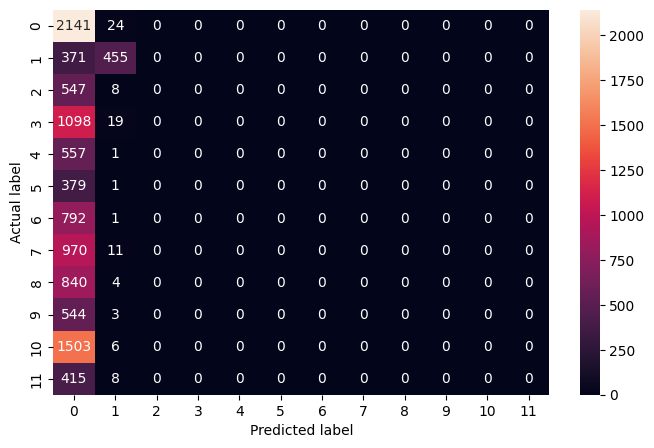

,Accuracy,Recall,Precision,F1-score
0,0.242662,0.242662,0.107595,0.121725


In [126]:
rf_train_cls = model_performance_classification(rf_clf1, x_train, y_train)
rf_train_cls

Model is performing poorly

C:\Users\SERWAH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


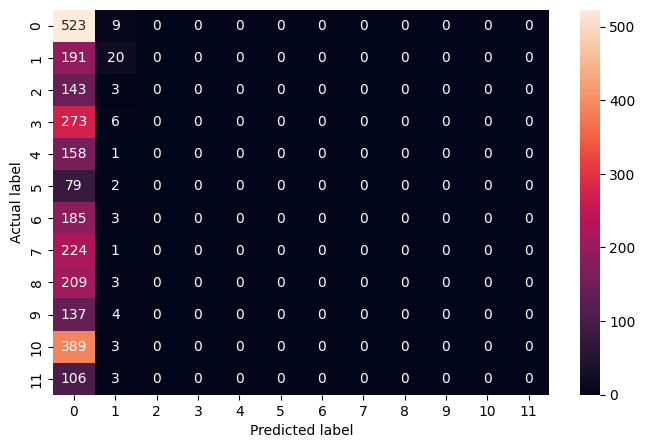

,Accuracy,Recall,Precision,F1-score
0,0.202991,0.202991,0.066945,0.07779


In [127]:
rf_val_cls = model_performance_classification(rf_clf1, x_val, y_val)
rf_val_cls

Model is overfiting as training precision is higher than validation accuracy

### Model Improvement strategy

- Balancing imbalanced data using SMOTE

In [128]:
# pip install imblearn
from imblearn.over_sampling import SMOTE

# instantiate the model
smt = SMOTE(random_state=0)

In [129]:
x_smt, y_smt = smt.fit_resample(x_new, y_new)

In [130]:
Counter(y_smt)

Counter({0: 3991, 2: 3991, 3: 3991, 1: 3991})

In [131]:
#split data
x_train_val, x_test, y_train_val, y_test = train_test_split(x_smt,y_smt, test_size = 0.2, random_state = 0)
x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val, test_size = 0.2, random_state = 0)

In [132]:
# training the model
rf2_clf2 = RandomForestClassifier(random_state=0)

# train the model
rf2_clf2.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

C:\Users\SERWAH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


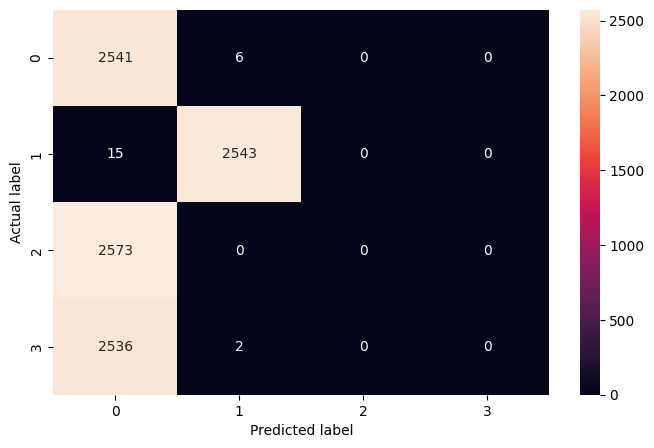

,Accuracy,Recall,Precision,F1-score
0,0.497651,0.497651,0.332256,0.373336


In [133]:
rf2_train_clf2 = model_performance_classification(rf2_clf2, x_train, y_train)
rf2_train_clf2

Performance did not improve, Target Rating may not relate so much to the features so model finds it difficult to see how those features will help predict Rating. Rating is misused. It is by categories of people that bought the video games and not really Rating on the video games. Hence model is struggling to understand. 

C:\Users\SERWAH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


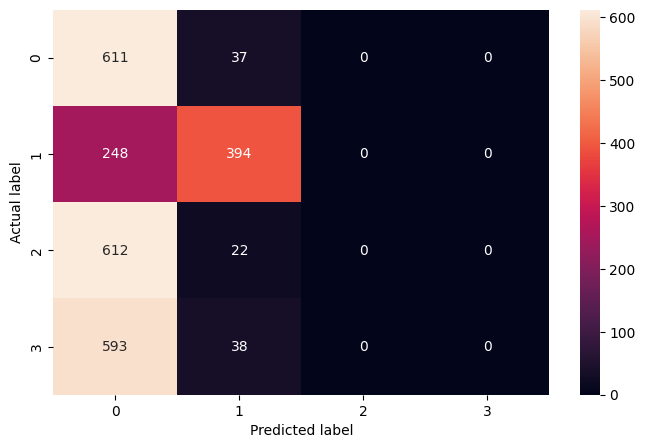

,Accuracy,Recall,Precision,F1-score
0,0.393346,0.393346,0.27671,0.289038


In [134]:
rf2_val_clf2 = model_performance_classification(rf2_clf2, x_val, y_val)
rf2_val_clf2

D. The features are not really related. Model could not understand the pattern and in my view the model is underfitting. It did not do well in training and neither did it do well in the validation. 

E. The model is underfitting  because the performance on  Accuracy, Recall, Precision and F1 score are low in both the training  and the validation set. The model is struggling to understand the patterns in the training data and also struggling to make meaning in the Validation.

F. No the model is not reliable. It is underfitting and you cannot deploy an underfit model into production. If you are using an AI bot cleaner and instead of cleaning the demarcated potions of your house it rather stays in a corner or moves slowly it means that AI bot cleaner is not reliable and hence underfit. Hence in practice an underfitted model is not reliable and connot be deployed.

## Unsupervised Learning

#### Solution 2g)

-unsupervised learning / clustering due to the word *groups* in the question.
- No target. Goal is to grouping data to derive insight
- Uses Distance measure, hence data needs to be scaled

In [135]:
vid_gamz_df.sample(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Platform_Primary,Global_Sales_log
2092,Puzzler Collection,DS,2008.0,Puzzle,Ubisoft,0.16,0.275,0.0,0.04,0.99,71.0,5.0,7.5,0.0,Route 1 Games,E,DS,-0.010049
11981,Second Sight,XB,2004.0,Adventure,Codemasters,0.05,0.020,0.0,0.00,0.07,75.0,46.0,7.5,6.0,Free Radical Design,T,Others,-2.659259
3629,Guitar Hero Live,XOne,2015.0,Misc,Activision,0.30,0.200,0.0,0.05,0.55,81.0,21.0,7.5,50.0,FreeStyleGames,T,Others,-0.597836
3915,Dynasty Warriors,PSP,2004.0,Action,Tecmo Koei,0.18,0.000,0.1,0.02,0.51,62.0,26.0,7.5,24.0,Koei,T,PSP,-0.673344
5398,MVP 06 NCAA Baseball,XB,2006.0,Sports,Electronic Arts,0.25,0.070,0.0,0.01,0.34,75.0,29.0,7.5,17.0,EA Canada,E,Others,-1.078809


In [136]:
# Drop irrelevant columns
vid_gamz_df2 = vid_gamz_df.drop(["Name", "Platform", "Year_of_Release",
              "Publisher", "Developer", "Global_Sales_log"], axis = 1)

In [137]:
# select numeric variables
x = vid_gamz_df2.select_dtypes(include="number")
x

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,0.60,0.275,0.10,0.075,82.53,76.0,51.0,7.5,50.0
1,0.60,0.275,0.10,0.075,40.24,0.0,0.0,7.5,0.0
2,0.60,0.275,0.10,0.075,35.52,82.0,52.5,7.5,50.0
3,0.60,0.275,0.10,0.075,32.77,80.0,52.5,7.5,50.0
4,0.60,0.275,0.10,0.075,31.37,0.0,0.0,7.5,0.0
...,...,...,...,...,...,...,...,...,...
16712,0.00,0.000,0.01,0.000,0.01,0.0,0.0,7.5,0.0
16713,0.00,0.010,0.00,0.000,0.01,0.0,0.0,7.5,0.0
16714,0.00,0.000,0.01,0.000,0.01,0.0,0.0,7.5,0.0
16715,0.01,0.000,0.00,0.000,0.01,0.0,0.0,7.5,0.0


In [138]:
# Normalize the data
scaler = StandardScaler()

x_sc = scaler.fit_transform(x)

Supervised method uses distances. We scale because we do not want one variable to over shadow the other. We need to calculate how similar the rows are.

### Clustering
- Process of putting similar into groups and non similar iteams into group
- We will use KMeans Clustering 

In [139]:
# instantiate the model
sum_sqd_er  =[]

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_sc)
    sum_sqd_er.append(kmeans.inertia_)

C:\Users\SERWAH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SERWAH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SERWAH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SERWAH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

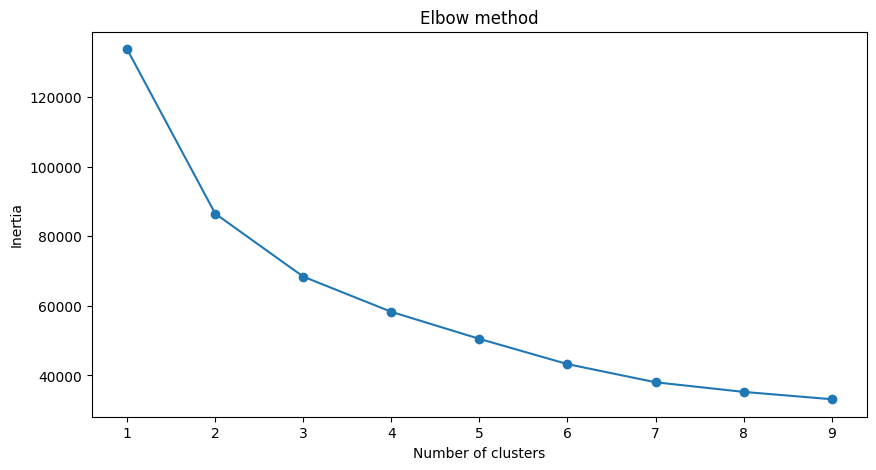

In [140]:
frame = pd.DataFrame({"Cluster": range(1, 10), "SSE": sum_sqd_er})

plt.figure(figsize = (10, 5))
plt.plot(frame["Cluster"], frame["SSE"], marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow method")
plt.show()

We can pick 3 or 4 groups looking at the elbow curve

In [141]:
kmeans = KMeans(n_clusters = 3, random_state=0)

# make prediction group for data
pred = kmeans.fit_predict(x_sc)

C:\Users\SERWAH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [142]:
# assign the predicted clusters to dataframe
vid_gamz_df2["cluster"] = pred

In [143]:
# select a categorical variable and other 
cat_var = "Genre"
cat_var2 = "Rating"


In [144]:
# select all the relevant non-categorical variables
num_colm = vid_gamz_df2.select_dtypes(include="number").columns.tolist()

num_colm

['NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales',
 'Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count',
 'cluster']

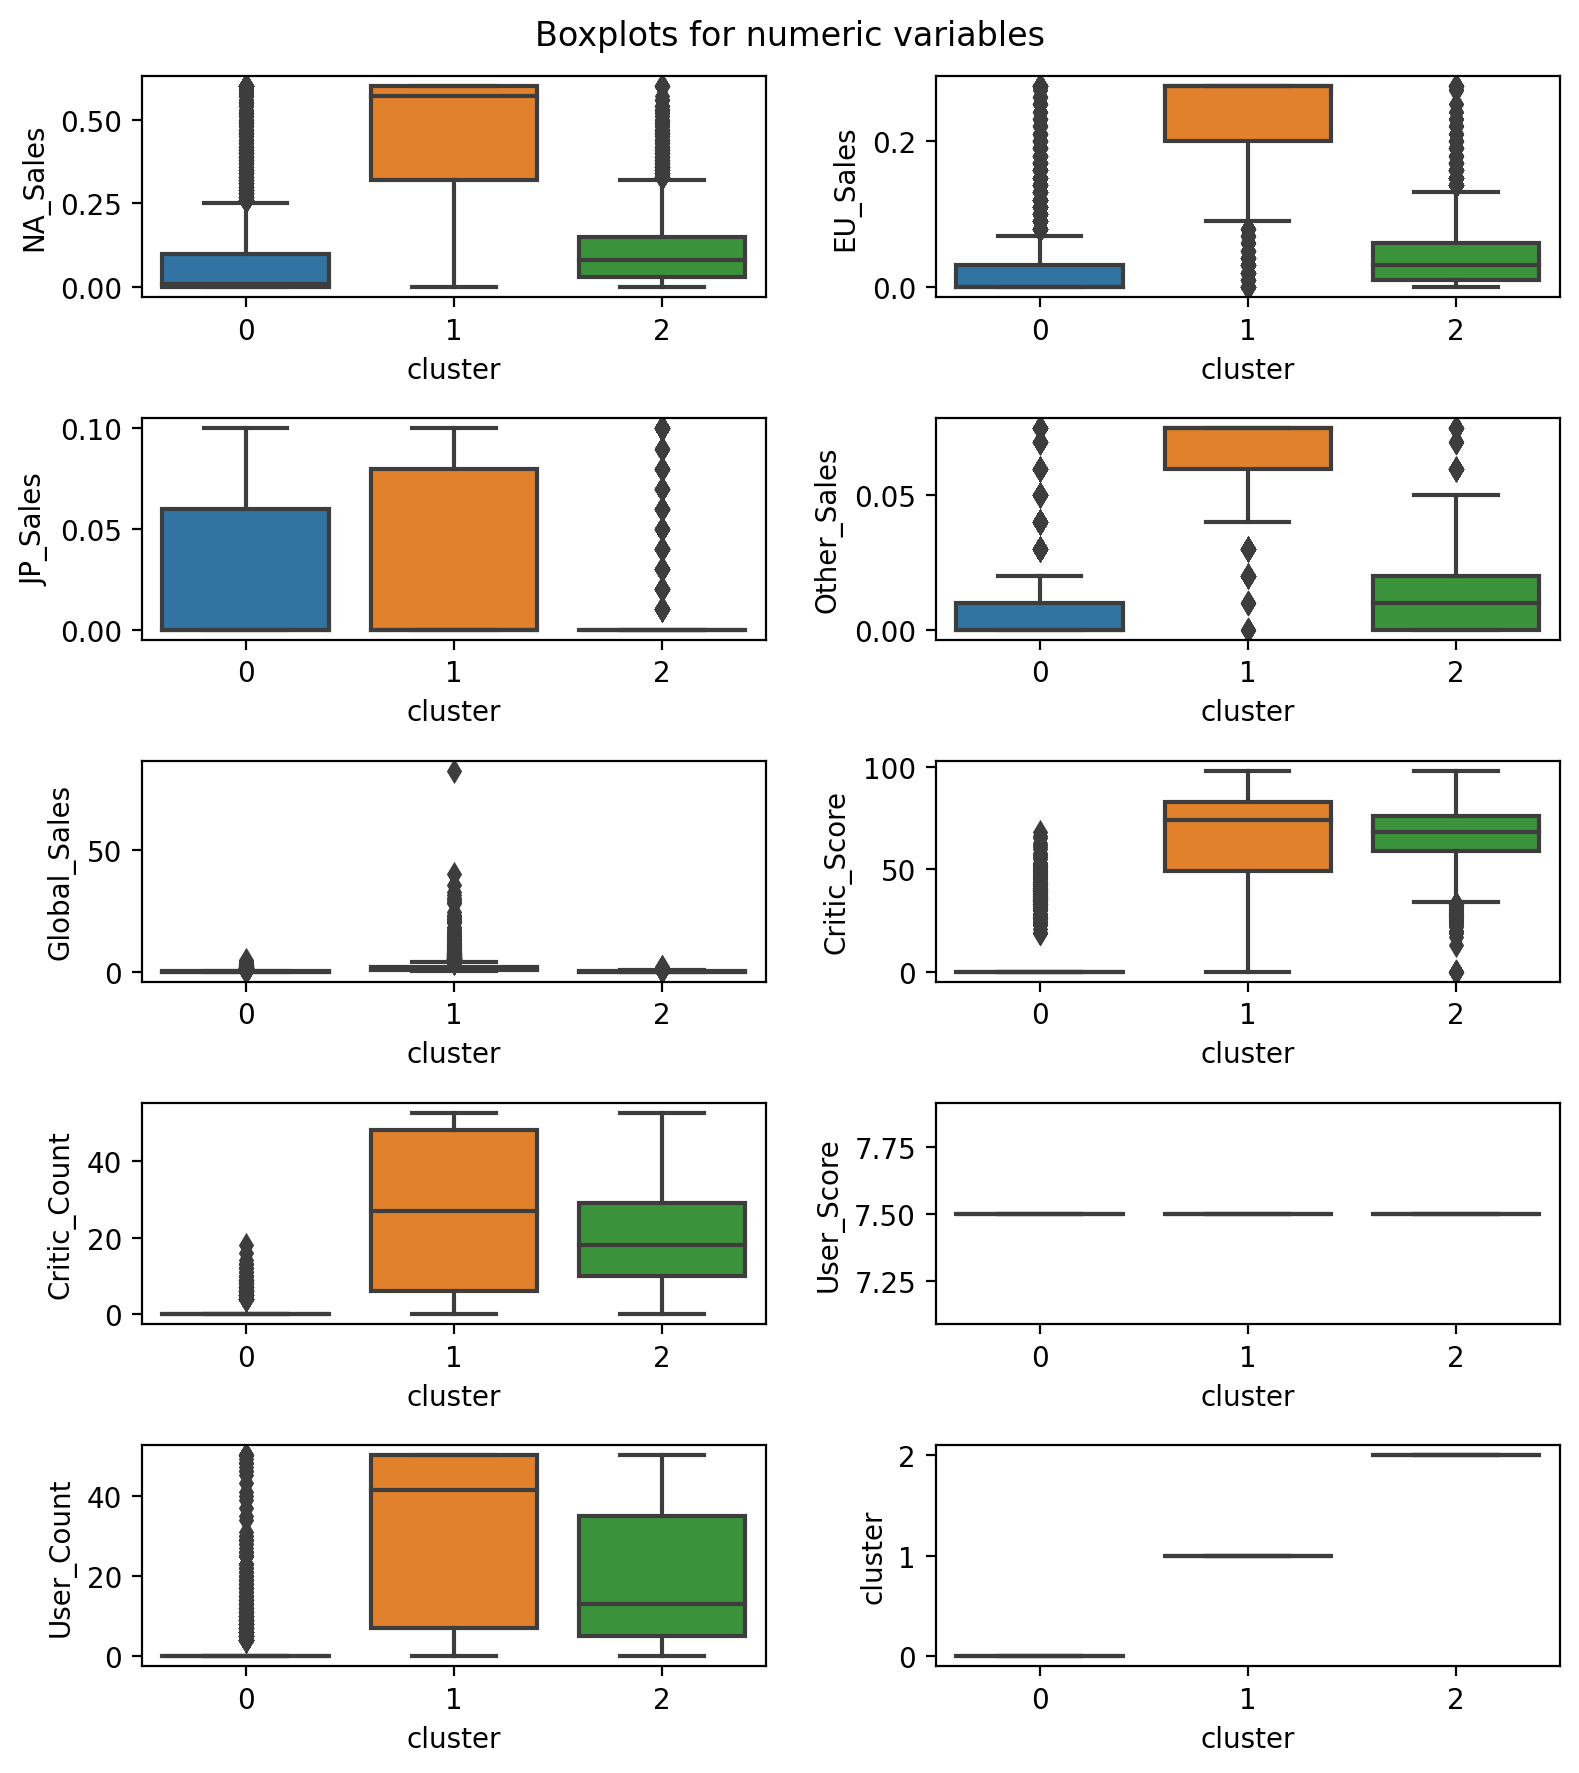

In [145]:
num_rows = 5
num_colms = 2
fig, ax = plt.subplots(num_rows, num_colms, figsize = (8,9),dpi = 200)
fig.suptitle("Boxplots for numeric variables")

count = 0

for i in range(num_rows):
    for j in range(num_colms):
        sns.boxplot(ax = ax[i, j], x = vid_gamz_df2["cluster"], y = vid_gamz_df2[num_colm[count]])
        count += 1
        
plt.tight_layout() # add this line for tight layout
plt.savefig("boxplot.png", dpi=300, bbox_inches='tight')  
plt.show()

The average sales of video games in NA , Europe, Japan, Other Sales were very high in group one (orange boxplots). Critic score,Critic Count and User Count were also high for those one. Sales in video games in group zero was low generally but was High in Japan.

In [146]:
vid_gamz_df2[vid_gamz_df2["cluster"]==1 ]

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Platform_Primary,cluster
0,Sports,0.60,0.275,0.10,0.075,82.53,76.0,51.0,7.5,50.0,E,Wii,1
1,Platform,0.60,0.275,0.10,0.075,40.24,0.0,0.0,7.5,0.0,Unknown,Others,1
2,Racing,0.60,0.275,0.10,0.075,35.52,82.0,52.5,7.5,50.0,E,Wii,1
3,Sports,0.60,0.275,0.10,0.075,32.77,80.0,52.5,7.5,50.0,E,Wii,1
4,Role-Playing,0.60,0.275,0.10,0.075,31.37,0.0,0.0,7.5,0.0,Unknown,Others,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5736,Strategy,0.00,0.270,0.00,0.050,0.31,79.0,33.0,7.5,50.0,E10+,Others,1
5764,Action,0.04,0.170,0.00,0.075,0.31,69.0,15.0,7.5,38.0,M,PSP,1
5896,Action,0.09,0.130,0.01,0.070,0.30,73.0,28.0,7.5,43.0,M,PSP,1
5943,Simulation,0.02,0.240,0.00,0.040,0.29,90.0,52.5,7.5,50.0,T,Others,1


All the video games in this group seems to have higher sales. The model actually learnt using the numerical variables

## Genre

In [147]:
# evaluate the clustering performance using internal evaluation metric

silhouette_avg = silhouette_score(x_sc, pred)
print(f"Silhouette Score: {silhouette_avg:.3f}")
davies_bouldin = davies_bouldin_score(x_sc, pred)
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")
calinski_harabasz = calinski_harabasz_score(x_sc, pred)
print(f"Calinski Harabasz Score: {calinski_harabasz:.3f}")

print(f'********************************')


# evaluate the clustering performance using external evaluation metric

true_labels = vid_gamz_df[cat_var]
ari = adjusted_rand_score(true_labels, pred)
print(f"Adjusted Rand Index: {ari:.3f}")
v_measure = v_measure_score(true_labels, pred)
print(f"V-measure Score: {v_measure:.3f}")
mutual_info = adjusted_mutual_info_score(true_labels, pred)
print(f"Mutual Information Score: {mutual_info:.3f}")


Silhouette Score: 0.340
Davies-Bouldin Index: 1.204
Calinski Harabasz Score: 7983.807
********************************
Adjusted Rand Index: 0.008
V-measure Score: 0.023
Mutual Information Score: 0.023


While the clustering seems to be well-separated and compact according to the internal evaluation metrics, the model's external evaluation metrics suggest that the clustering results are not very consistent with the true labels, indicating that the clustering performance may not be optimal.

## Rating

In [148]:
# evaluate the clustering performance using internal evaluation metric
silhouette_avg = silhouette_score(x_sc, pred)
print(f"Silhouette Score: {silhouette_avg:.3f}")
davies_bouldin = davies_bouldin_score(x_sc, pred)
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")
calinski_harabasz = calinski_harabasz_score(x_sc, pred)
print(f"Calinski Harabasz Score: {calinski_harabasz:.3f}")

print(f'********************************')

# evaluate the clustering performance using external evaluation metric
true_labels = vid_gamz_df[cat_var2]
ari = adjusted_rand_score(true_labels, pred)
print(f"Adjusted Rand Index: {ari:.3f}")
v_measure = v_measure_score(true_labels, pred)
print(f"V-measure Score: {v_measure:.3f}")
mutual_info = adjusted_mutual_info_score(true_labels, pred)
print(f"Mutual Information Score: {mutual_info:.3f}")


Silhouette Score: 0.340
Davies-Bouldin Index: 1.204
Calinski Harabasz Score: 7983.807
********************************
Adjusted Rand Index: 0.347
V-measure Score: 0.256
Mutual Information Score: 0.256


Based on the evaluation metrics, the clustering model did not perform well. The Silhouette Score indicates that the clusters are not well-separated, and the Davies-Bouldin Index indicates that the clusters are not well-defined. The Calinski Harabasz score is high, but this is not always a good indicator of cluster quality.

Looking at the external evaluation metrics, the Adjusted Rand Index, V-measure score, and Mutual Information Score are all quite low. The scores show that the projected clusters do not match the true labels very well, which suggests that the clustering algorithm did not successfully identify the underlying patterns in the data. These findings suggest that the clustering technique did not work well with this dataset